## 질문zip
---
- sns.factorplot('Pclass','Survived',hue='Sex',data=data) 에서 factorplot을 더이상 지원하지 않아 나는 catplot으로 하였는데 다른 그루들은 어떻게 표현했는 지 궁금하다. -> catplot으로 하면 ax[1]을 사용하지 못하므로 pointplot을 이용했다고 함.
- plt.close(2) 이걸 하면 catplot 그래프 출력이 안 됨
- familsize 부분에서 혼자 있는 것이 **Sex**나 **Pclass**와 상관없이 해롭다는 것을 알 수 있다.  이해가 안 된다.
- KNN출력결과가 다르게 나오는데 다른 그루들은 어떻게 나오는지

## Part1: Exploratory Data Analysis(EDA)

In [439]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [440]:
data = pd.read_csv('train.csv')

In [441]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [442]:
# 결측치 제거
data.isna().sum() # isnull() 과 같은 결과 출력

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [443]:
# age, cabin, embarked 가 null값을 포함하므로 이를 수정.
# 수정하는 코드 어디?

In [444]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## How many Survived??

In [445]:
# matplotlib와 seaborn을 사용하여 Survived (생존 여부) 에 대한 시각화를 2가지 형태로 보여주는 코드

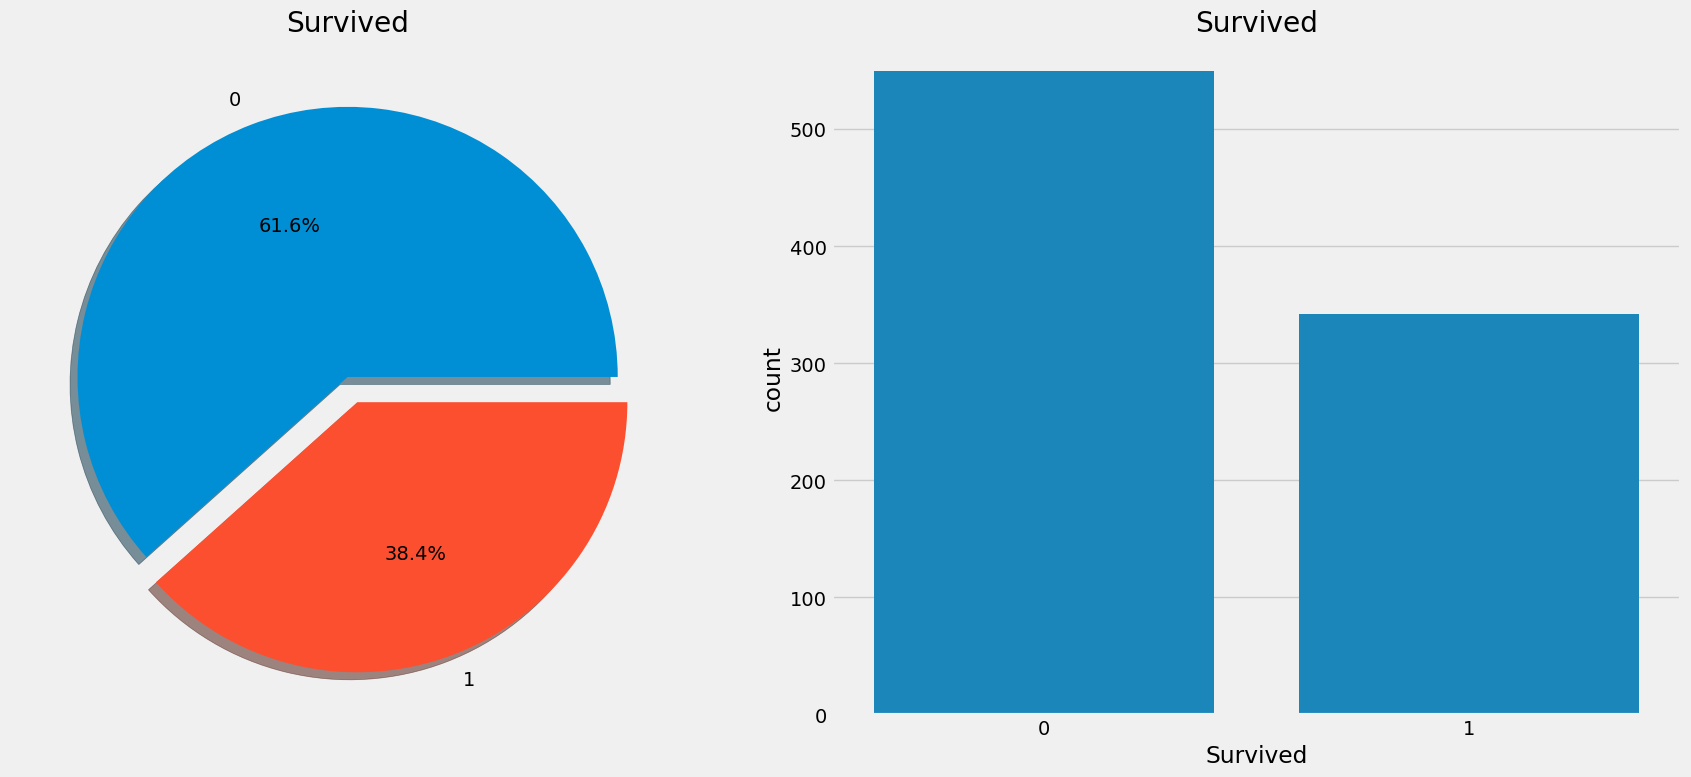

In [446]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
# f는 전체 객체, ax는 각 subplot의 축(ax)를 담은 리스트
# 두 개의 그래프를 합치도록 subplots
# 1행 2열 형태

# 왼쪽: 파이 차트
data['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], # 생존쪽을 약간 띄워서 
    autopct='%.1f%%', # 소수점 첫째 자리까지 표시
    ax=ax[0], # 첫 번째 ax 요소에 그리기
    shadow=True # 그림자 가가
)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# 오른쪽: 막대 그래프
sns.countplot(x='Survived', data=data, ax=ax[1])
# countplot 범주형 데이터의 개수를 세어 막대 그래프로 시각화

ax[1].set_title('Survived')

f.tight_layout()
plt.show()

%.1f%% 에서 %%를 두 번 사용하는 이유?  
%자체도 출력하기 위함

## Analysing The Features  
### Sex--> Categorical Feature

In [447]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

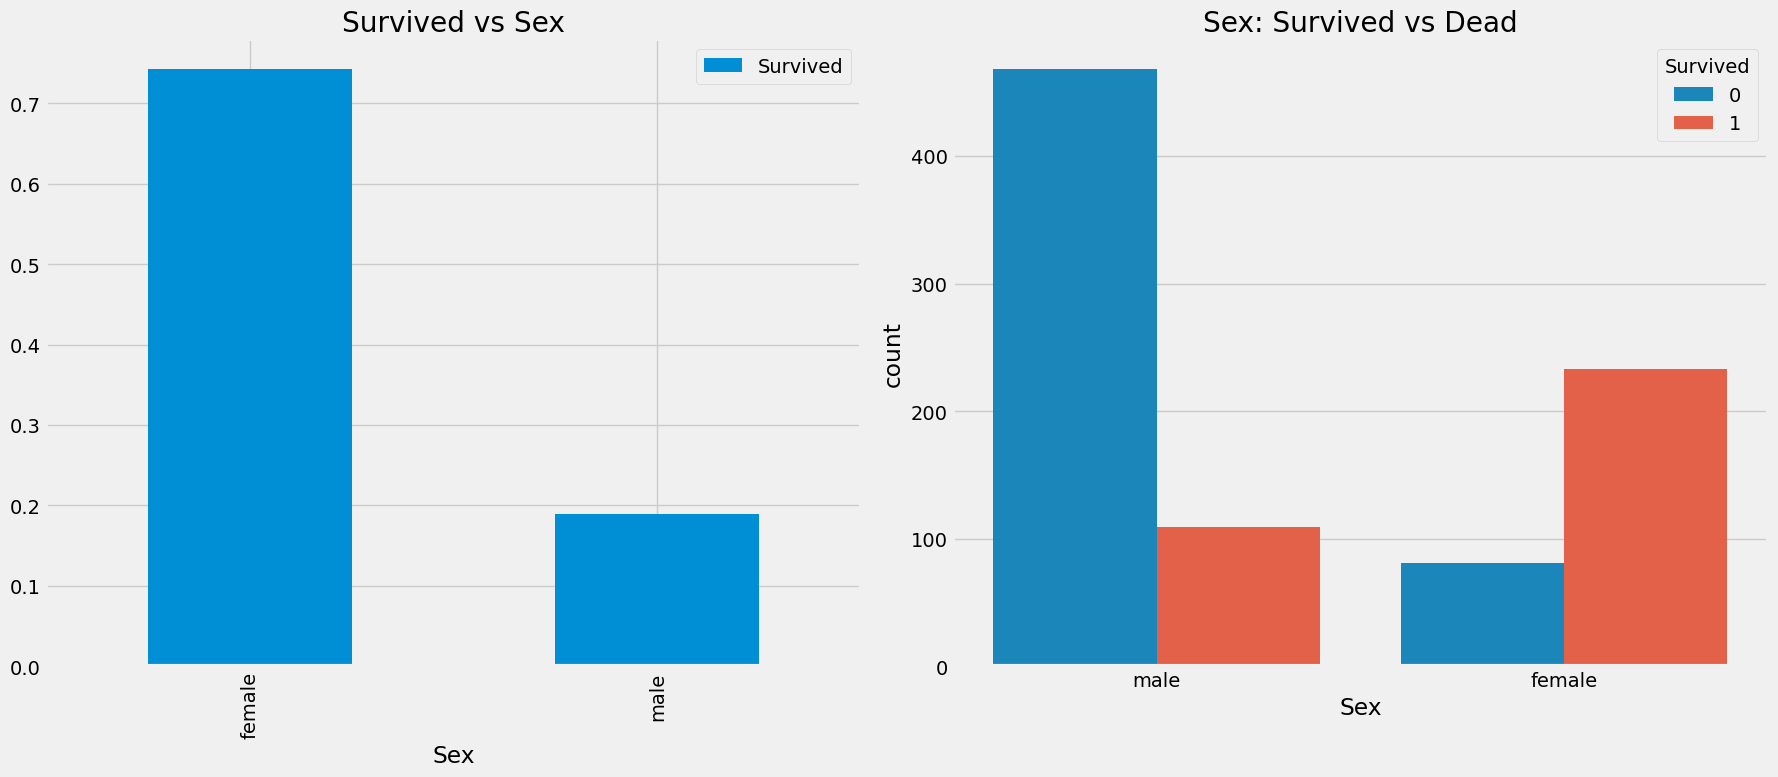

In [448]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
# hue 색깔로 그룹을 나누는 기준
ax[1].set_title('Sex: Survived vs Dead')

f.tight_layout()
plt.show()


✔️ countplot은 "각 생존 여부에 대한 개수만 시각화" 해줄 뿐, 전체 수는 따로 안 보여준다.

배에 탑승한 남성의 수가 여성보다 훨씬 많습니다.  
그런데도 구조된 여성의 수는 남성보다 거의 두 배에 달한다.  
여성의 생존률은 약 **75%**인 반면, 남성은 18~19% 정도이다.  
  
이건 모델링에 아주 중요한 특징(피처)처럼 보인다.  
다른 피처들도 확인해보겠다.


## Pclass --> Ordinal Feature

In [449]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')
# margins = True 행과 열의 총합(All)을 같이 보여준다.
# style.background_gradient DataFrame에 색상 그라디언트를 입혀서 숫자 크기를 직관적으로 보이게 해준다.
# cmap='summer_r' 노랑~연두로 반대로 적용됨(color)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


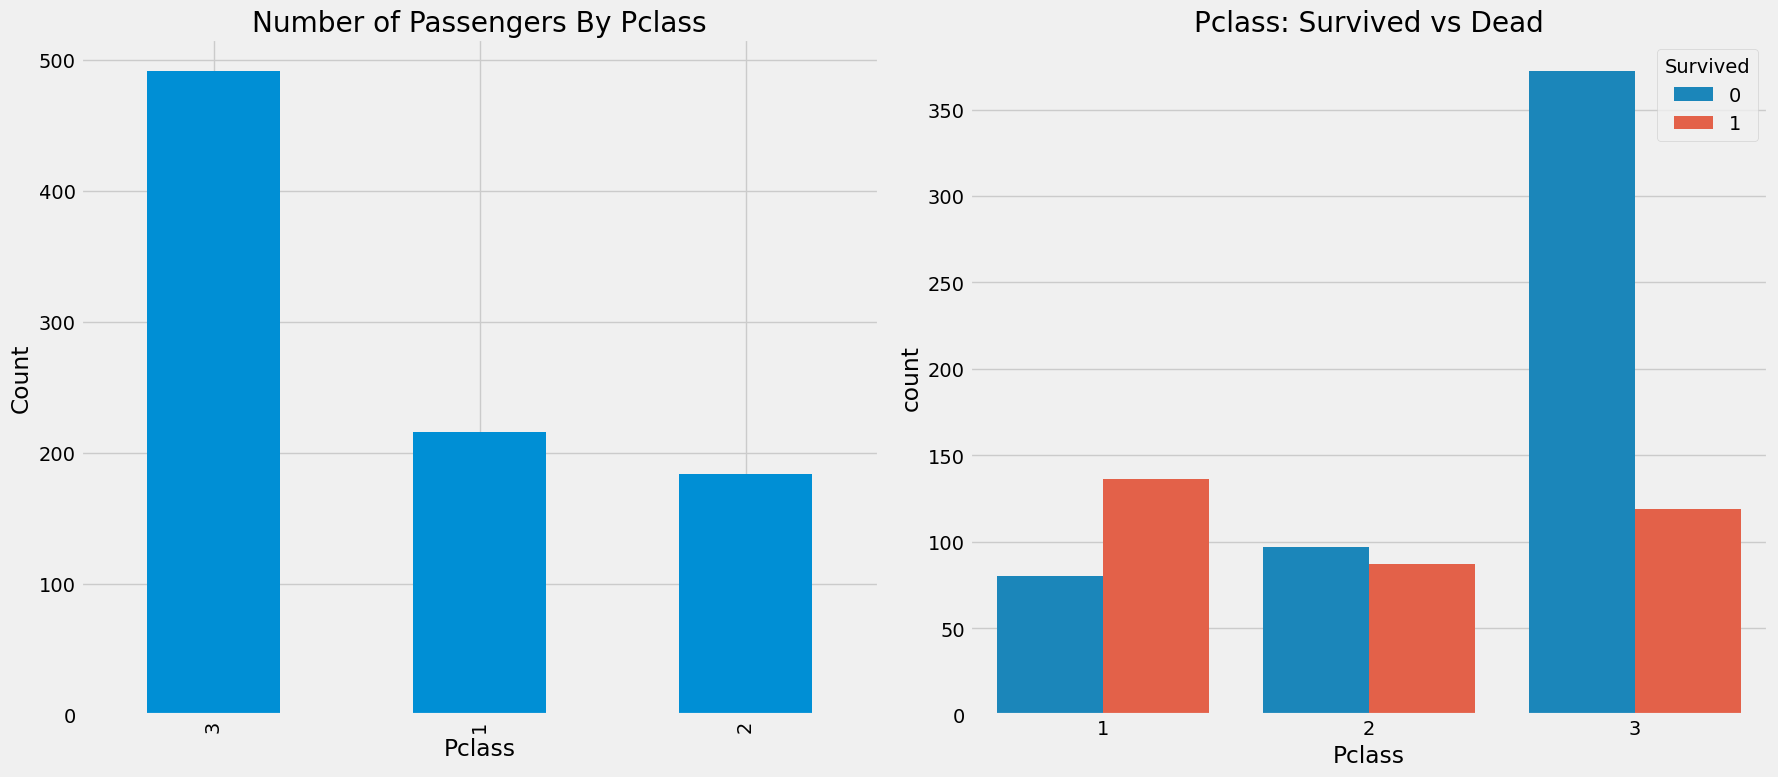

In [450]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

f.tight_layout()
plt.show()

🔍 인사이트  
Pclass와 생존률 데이터를 보면, 1등석 승객의 생존률이 높고, 3등석은 낮은 경향이 뚜렷하게 나타난다.  

따라서, 타이타닉 사고 당시 부유한 사람들이 구조 우선권을 부여받았고,  
상류층의 생존율이 높았다는 사회적, 경제적 불평등을 반영하는 중요한 인사이트가 될 수 있다.

In [451]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

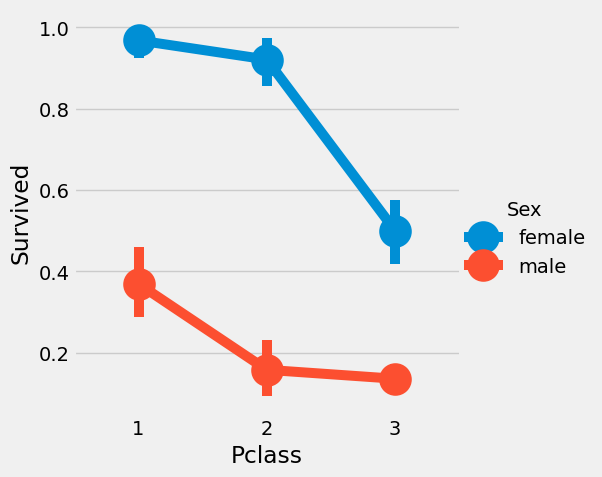

In [452]:
# sns.factorplot('Pclass','Survived',hue='Sex',data=data)
# 더이상 factorplot을 지원하지 않아 catplot으로 표현

sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

🔍 인사이트  
Pclass와 관계없이, 여성은 구조 시 우선권을 받았다는 것이 분명하다.  
Pclass 1의 남성들조차 생존율이 매우 낮다.    
Pclass도 중요한 특징인 것 같다.  
성별과 Pclass가 구조 시 영향을 많이 받았다는 인사이트를 도출할 수 있다.

## Age--> Continous Feature

In [453]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',round(data['Age'].mean(),2),'Years') # 나이라서 소수점 둘째자리 까지 나오게 출력함

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.7 Years


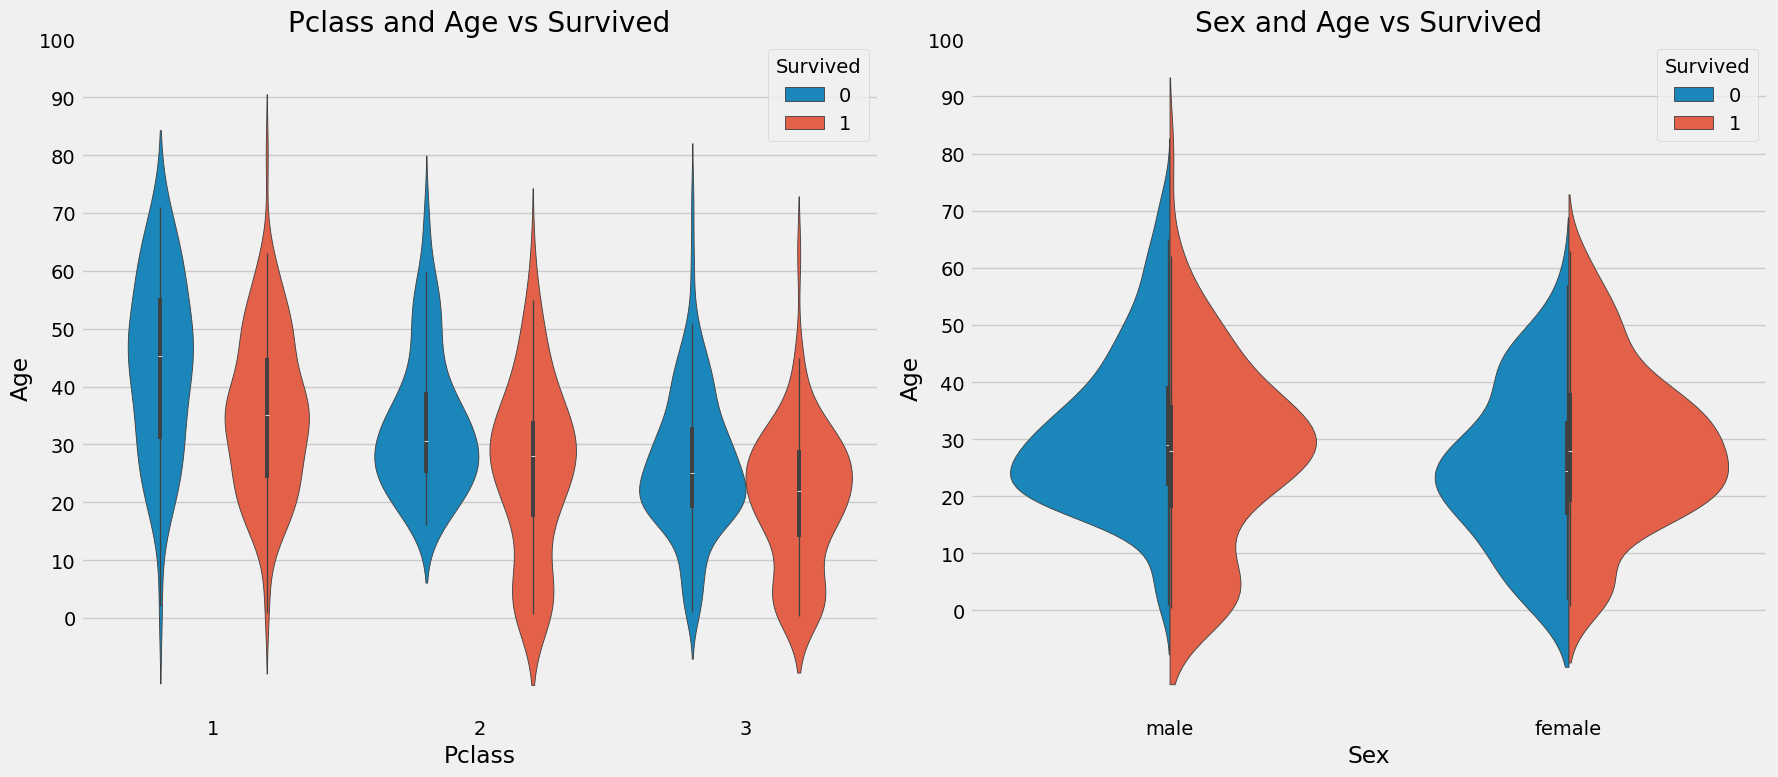

In [454]:
f,ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) # 110까지 10씩 증가 -> 100까지 출

sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

f.tight_layout()
plt.show()

🔍 인사이트  
나이가 어린 어린이들은 Pclass와 관계없이 생존 확률이 높다.  
어린이를 먼저 구조했을 가능성이 높다.

Age 컬럼에는 총 177개의 결측치가 존재하며, 단순히 전체 평균으로 대체하는 방식은 부적절할 수 있다.  
예를 들어, 어린이에게 전체 평균 나이인 29세를 넣는 것은 비현실적이다.  
  
이를 보완하기 위해 Name 컬럼을 활용한 방법이 제안된다.  
Name에는 "Mr", "Mrs", "Miss", "Master" 등 호칭(title)이 포함되어 있어 승객의 성별과 대략적인 나이대를 유추할 수 있다.  
- "Mr"는 보통 성인 남성
- "Mrs"는 기혼 여성
- "Miss"는 미혼 여성 또는 어린 소녀
- "Master"는 어린 남자아이를 의미한다.

In [455]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

정규표현식 '([A-Za-z]+)\.' 의미  
(...): 괄호 안은 추출 대상 즉, 이 안에 해당되는 문자열을 뽑겠다는 뜻이다.  
  
`[A-Za-z]`: 대문자 AZ, 소문자 az 중 하나의 문자를 의미한다.  
`+`: 앞의 [A-Za-z]가 1개 이상 반복된다는 뜻이다.  
`\.`: .은 원래 정규식에서 "모든 문자"를 뜻하는 특수문자라서, 진짜 마침표(.)를 의미하려면 `\.`처럼 백슬래시로 이스케이프해야 한다.  
- "Smith, Mr. John" → 'Mr'
- "Brown, Mrs. Clara" → 'Mrs'

In [456]:
data.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [457]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')
# .T 행과 열을 바꿔주는 역할

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


replace함수를 배울 때 딕셔너리 형식으로 배워서 리스트 형식의 변환에 대해 알아보았다.

✨ Tip  
- 리스트 방식  
→ 바꿀 값이 많고, 1:1 매칭이 깔끔하게 될 때  
→ 예: 호칭이나 라벨 등 규칙적으로 치환할 때  
→ ['A', 'B', 'C'], ['X', 'Y', 'Z']  
  
- 딕셔너리 방식  
→ 바꿀 값이 적고, 읽기 쉽게 표현하고 싶을 때  
→ 예: 몇 개만 특정 값으로 바꿔줄 때  
→ {'A': 'X', 'B': 'Y'}

In [458]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                        inplace=True)

In [459]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Filling NaN Ages

In [460]:
## Assigning the NaN Values with the Ceil values of the mean ages
# for i in range(len(data['Age'])):
#     if data['Age'].isna().iloc[i]:  # Age가 NaN인 경우만 확인
#         if data['Initial'].iloc[i] == 'Mr':
#             data.loc[i, 'Age'] = 33
#         elif data['Initial'].iloc[i] == 'Mrs':
#             data.loc[i, 'Age'] = 36
#         elif data['Initial'].iloc[i] == 'Master':
#             data.loc[i, 'Age'] = 5
#         elif data['Initial'].iloc[i] == 'Miss':
#             data.loc[i, 'Age'] = 22
#         elif data['Initial'].iloc[i] == 'Other':
#             data.loc[i, 'Age'] = 46


data.loc[(data.Age.isna())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isna())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isna())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isna())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isna())&(data.Initial=='Other'),'Age']=46

=> 성능을 고려하면 벡터화된 코드가 훨씬 더 효율적이고 빠르기 때문에, 데이터의 크기가 크거나 성능이 중요한 경우에는 벡터화된 코드를 사용하는 것이 좋습니다.
반복문을 사용하는 방법은 작은 데이터셋이나 간단한 처리에 적합하지만, 성능이 중요한 상황에서는 벡터화를 사용하는 것이 더 나은 선택입니다.

벡터화(Vectorization)
- 데이터 처리에서 매우 중요한 개념으로, 데이터를 반복문 없이 한 번에 처리하는 방식  
-  특히, pandas와 같은 라이브러리에서 제공하는 벡터화된 연산은 반복문을 사용하는 것보다 훨씬 효율적  
- 벡터화는 성능 향상뿐만 아니라 코드의 간결성도 가져옴

✅isnull() vs isna() 차이점은?
  
isnull(): 원래부터 있었던 함수  
isna(): 나중에 추가된 더 직관적인 이름  

In [461]:
data.Age.isna().any()

False

In [462]:
data['Survived'].max()

1

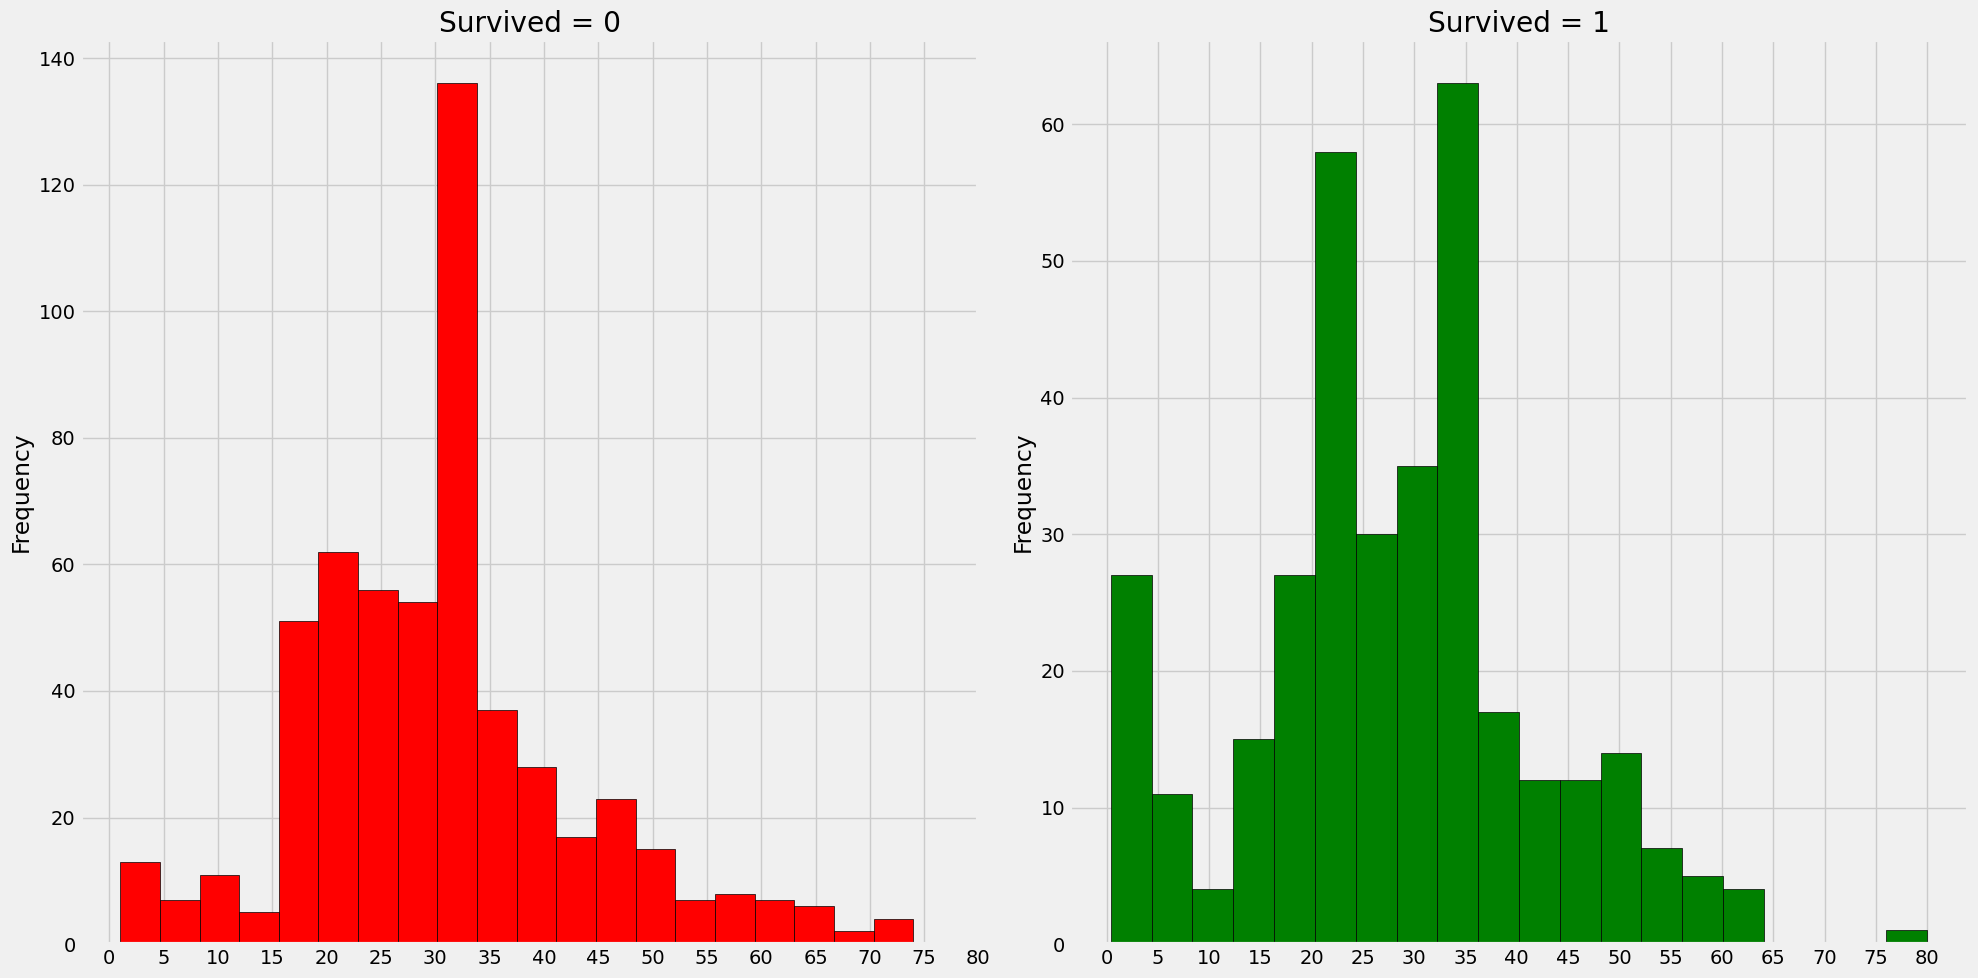

In [463]:
f, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x = list(range(0,85,5))
ax[0].set_xticks(x) # x축 구간

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2) # x축 구간

f.tight_layout()
plt.show()

Q. xticks 할 때 왜 range범위를 list()로 감싸는지?
  
range()는 이터레이터이기 때문에 인덱싱, 슬라이싱 등의 처리가 불가능  
set_xticks() 같은 함수는 보통 리스트 형태를 요구하므로 list()로 변환하는 것이 일반적

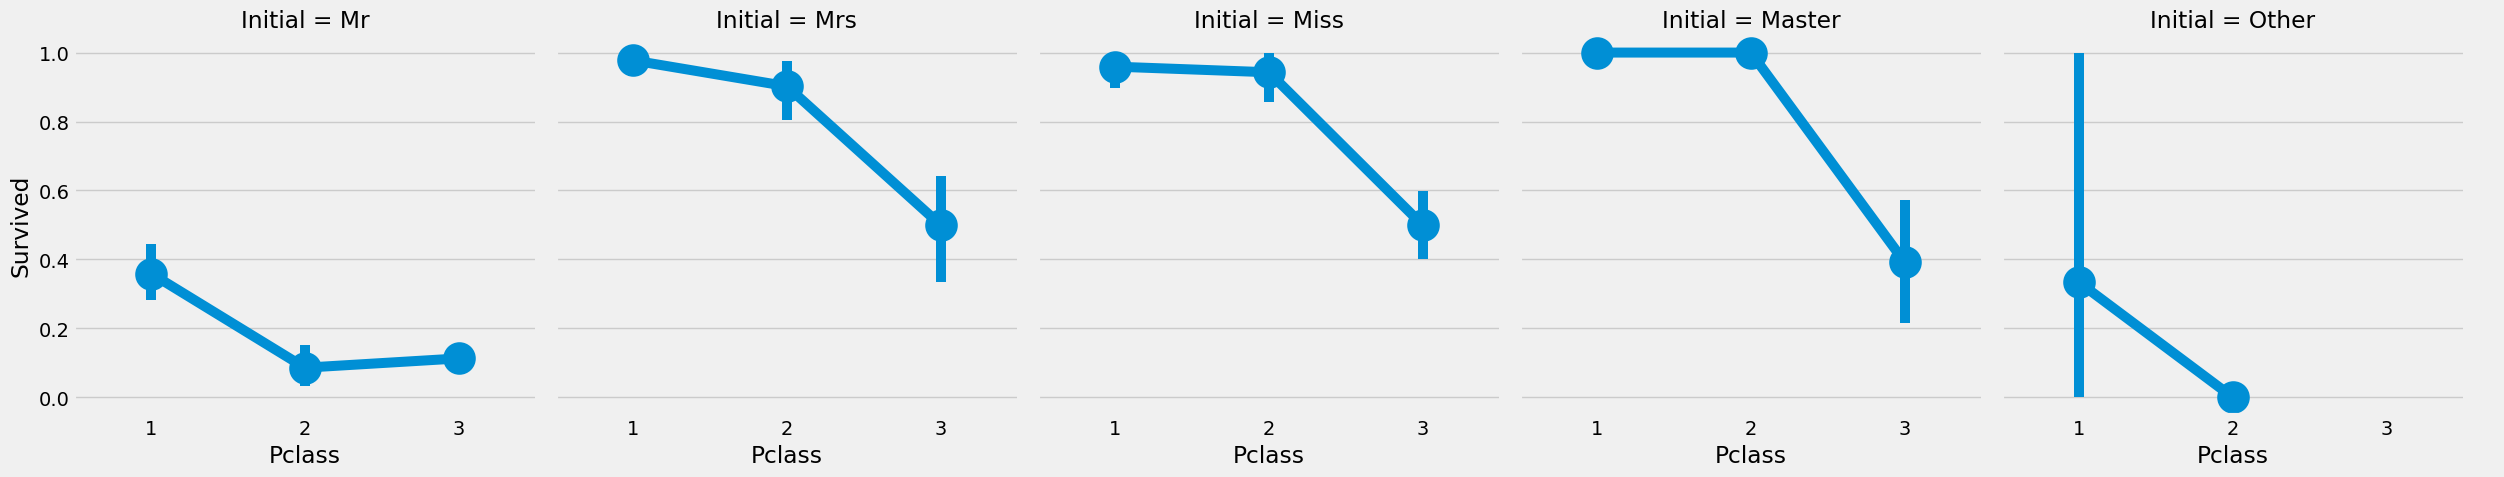

In [464]:
sns.catplot(x='Pclass',y='Survived', col='Initial', data=data, kind="point")
plt.show()

🔍 인사이트  
'여성 및 어린이 먼저' 정책은 계급에 관계없이 그대로 적용된다.

## Embarked--> Categorical Value

In [465]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [466]:
pd.crosstab([data.Embarked],[data.Survived],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


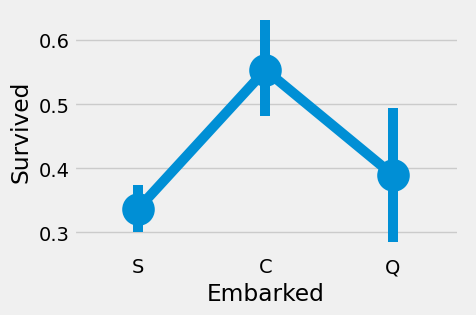

In [467]:
sns.catplot(x='Embarked',y='Survived',data=data, kind='point')
fig=plt.gcf() # plt.gcf()는 현재 활성화된 matplotlib의 그림 객체(figure)를 가져온다.
# 이 객체는 그래프의 크기나 속성 등을 수정할 수 있게 해준다.
fig.set_size_inches(5,3)
plt.show()

🔍생존 수로만 보면 S 항구가 가장 많았지만,  
비율로 보니 C 항구가 생존 확률이 높고 S 항구가 생존 확률이 가장 낮다.

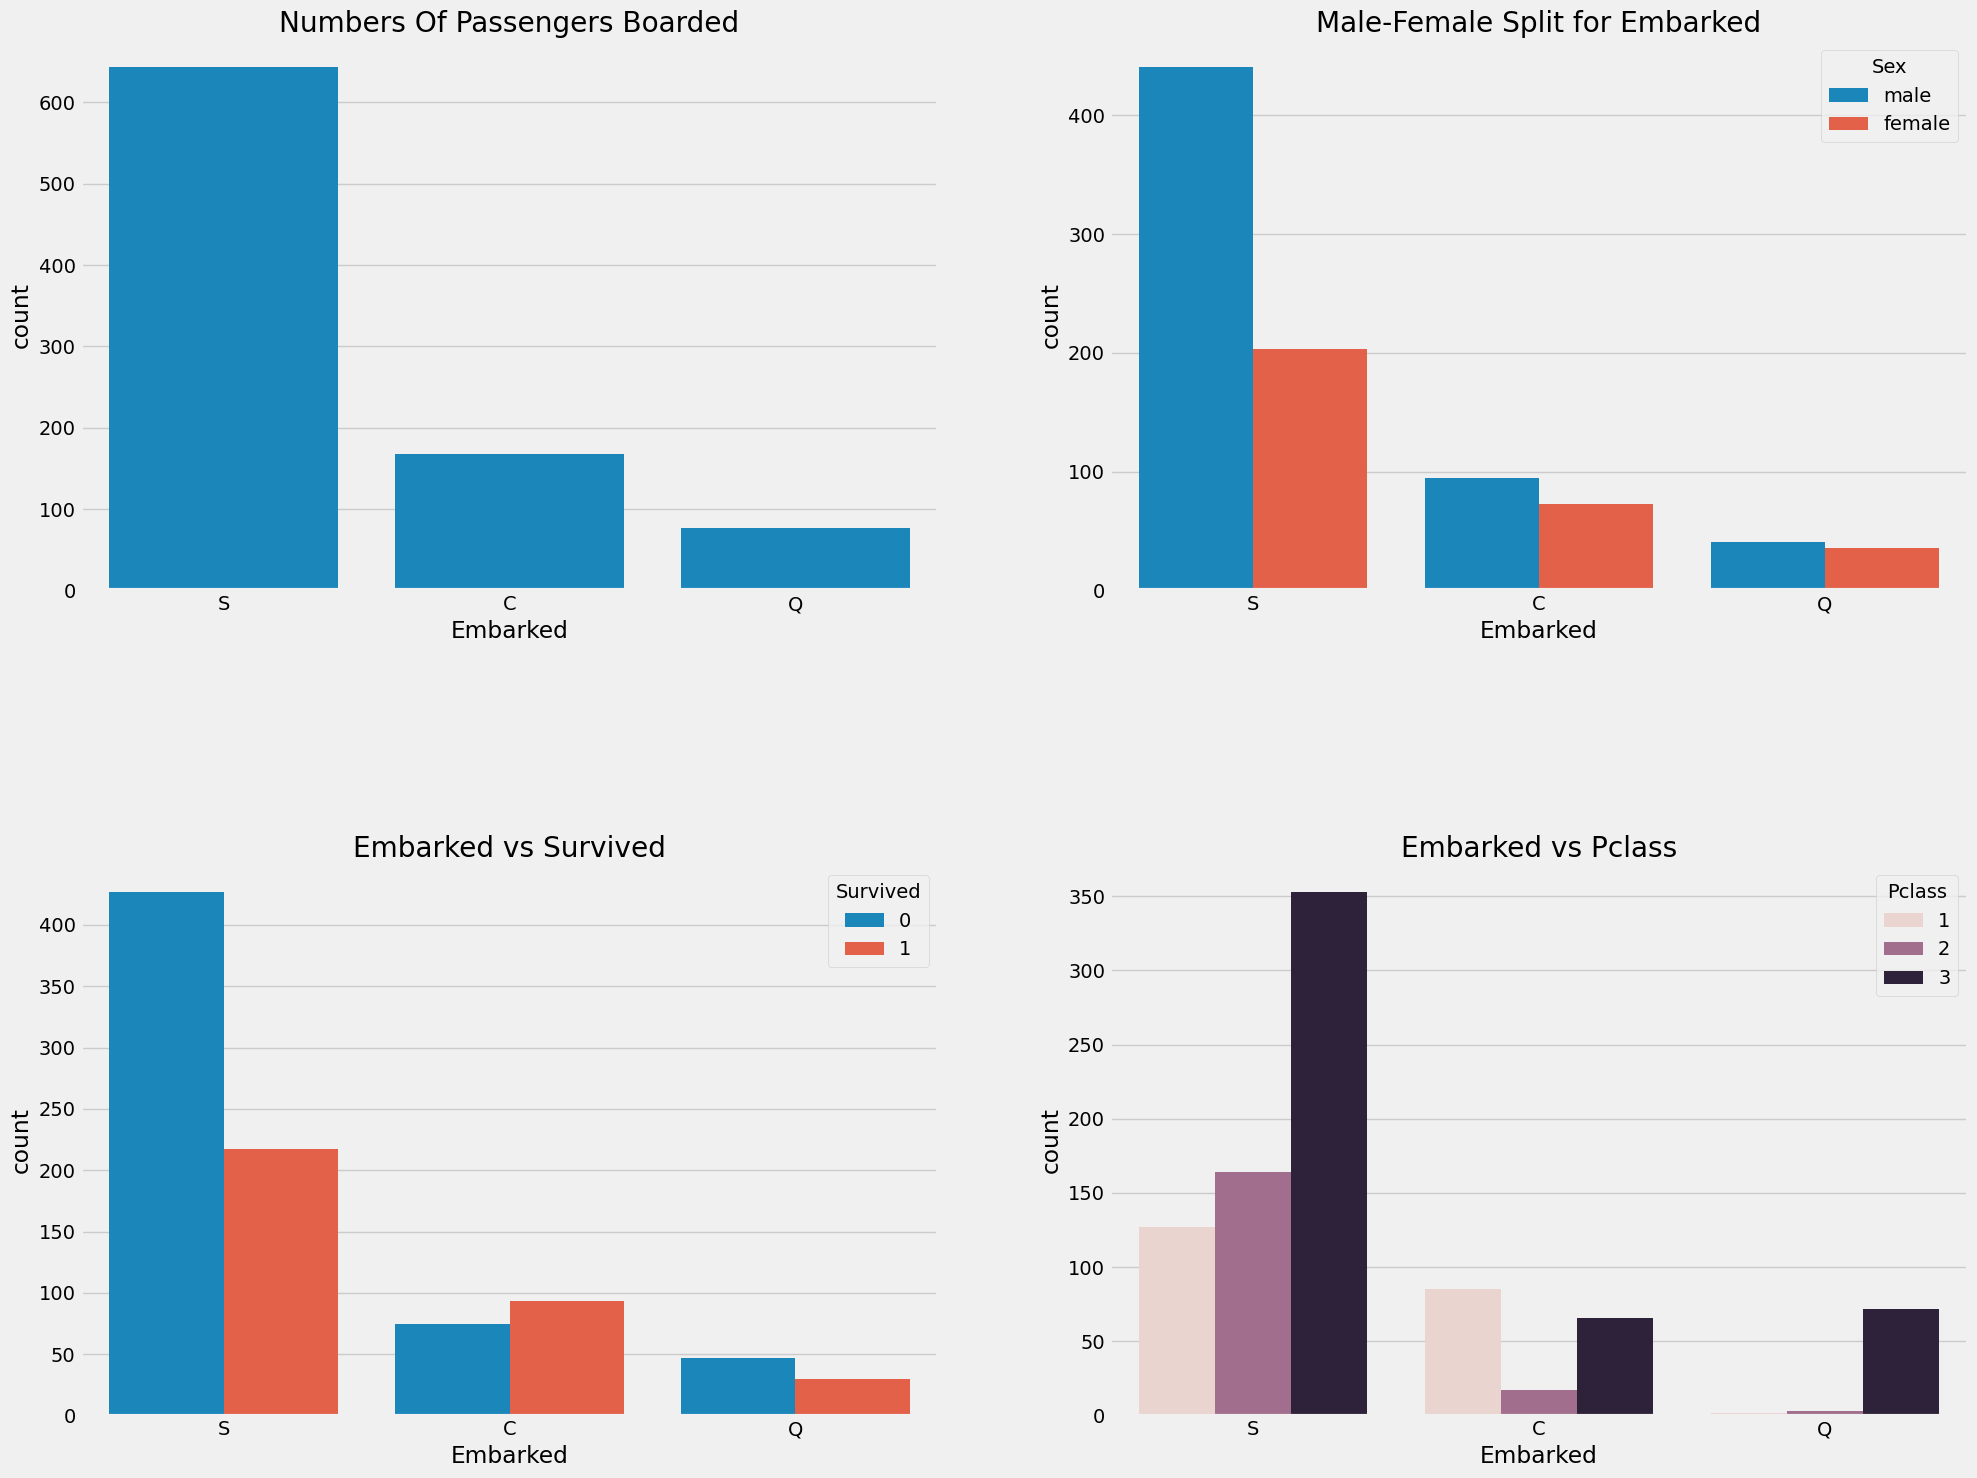

In [468]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('Numbers Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

f.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- wspace → 서브플롯 사이의 가로 간격 (width space)  
값이 클수록 그래프들 사이의 가로 간격이 넓어집니다.
  
- hspace → 서브플롯 사이의 세로 간격 (height space)  
값이 클수록 그래프들 사이의 세로 간격이 넓어집니다.

📌 Observations (관찰 내용)  
S 항구에서 가장 많은 승객이 탑승했으며, 이들 중 대다수가 3등급(Pclass3) 승객이었다.

C 항구에서 탑승한 승객들은 상대적으로 생존율이 높았다.
→ 이는 1등급과 2등급 승객들이 구조된 경우가 많았기 때문일 수 있다.

S 항구는 부유한 사람들이 많이 탑승한 항구처럼 보인다.
→ 그럼에도 불구하고 생존율은 낮았는데, 이는 3등급 승객의 약 81%가 생존하지 못했기 때문이다.

Q 항구에서는 **승객의 약 95%가 3등급(Pclass3)**이었다.

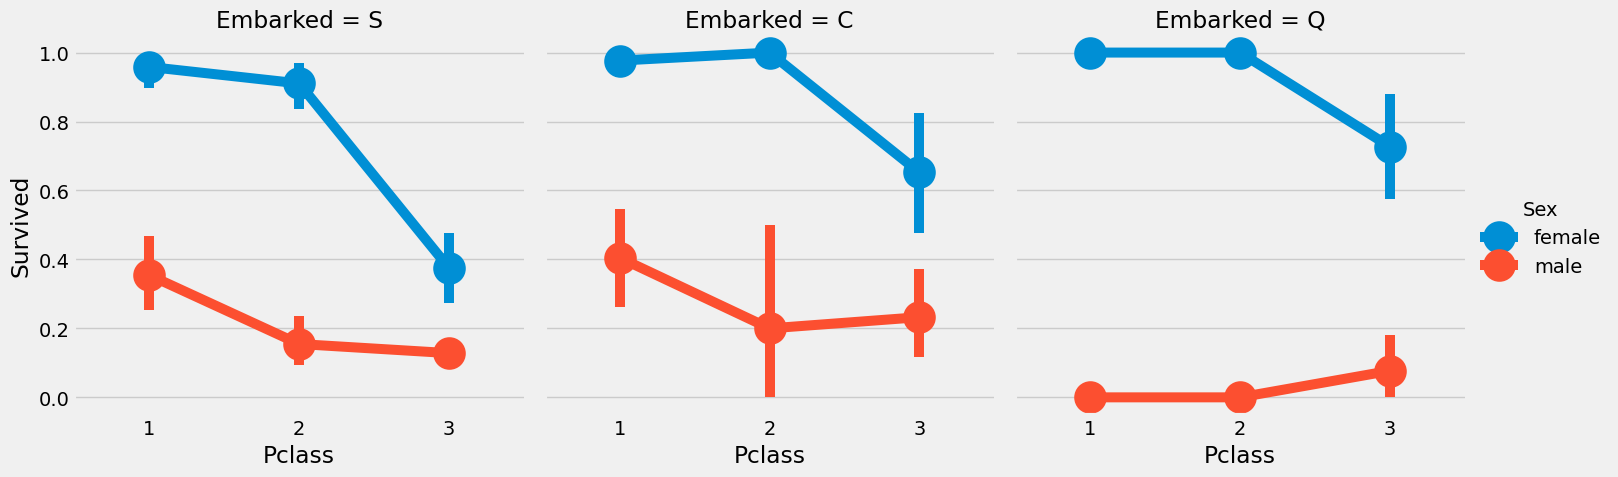

In [469]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data, kind='point')
plt.show()

📌 Observations (관찰 내용)  
1등급(Pclass1) 및 2등급(Pclass2) 여성의 생존 확률은 거의 1에 가까우며, 이는 등급과 관계없이 여성이라는 점이 큰 영향을 미쳤음을 보여준다.

S 항구에서 출발한 3등급 승객(Pclass3) 은 매우 불운했으며,
→ 특히 남성과 여성 모두의 생존율이 매우 낮았다.  
→ 이는 "돈이 생존을 좌우했다(Money Matters)"는 점을 시사한다.

Q 항구는 남성들에게 가장 불운한 항구로 보인다.
→ 거의 모든 남성 승객이 3등급 승객이었고, 생존률도 낮았다.

## Filling Embarked NaN

In [470]:
data['Embarked'].fillna('S',inplace=True)
# 가장 많은 승객이 탑승한 S 항구(Port S) 로 대체함.

In [471]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip-->Discrete Feature

In [472]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


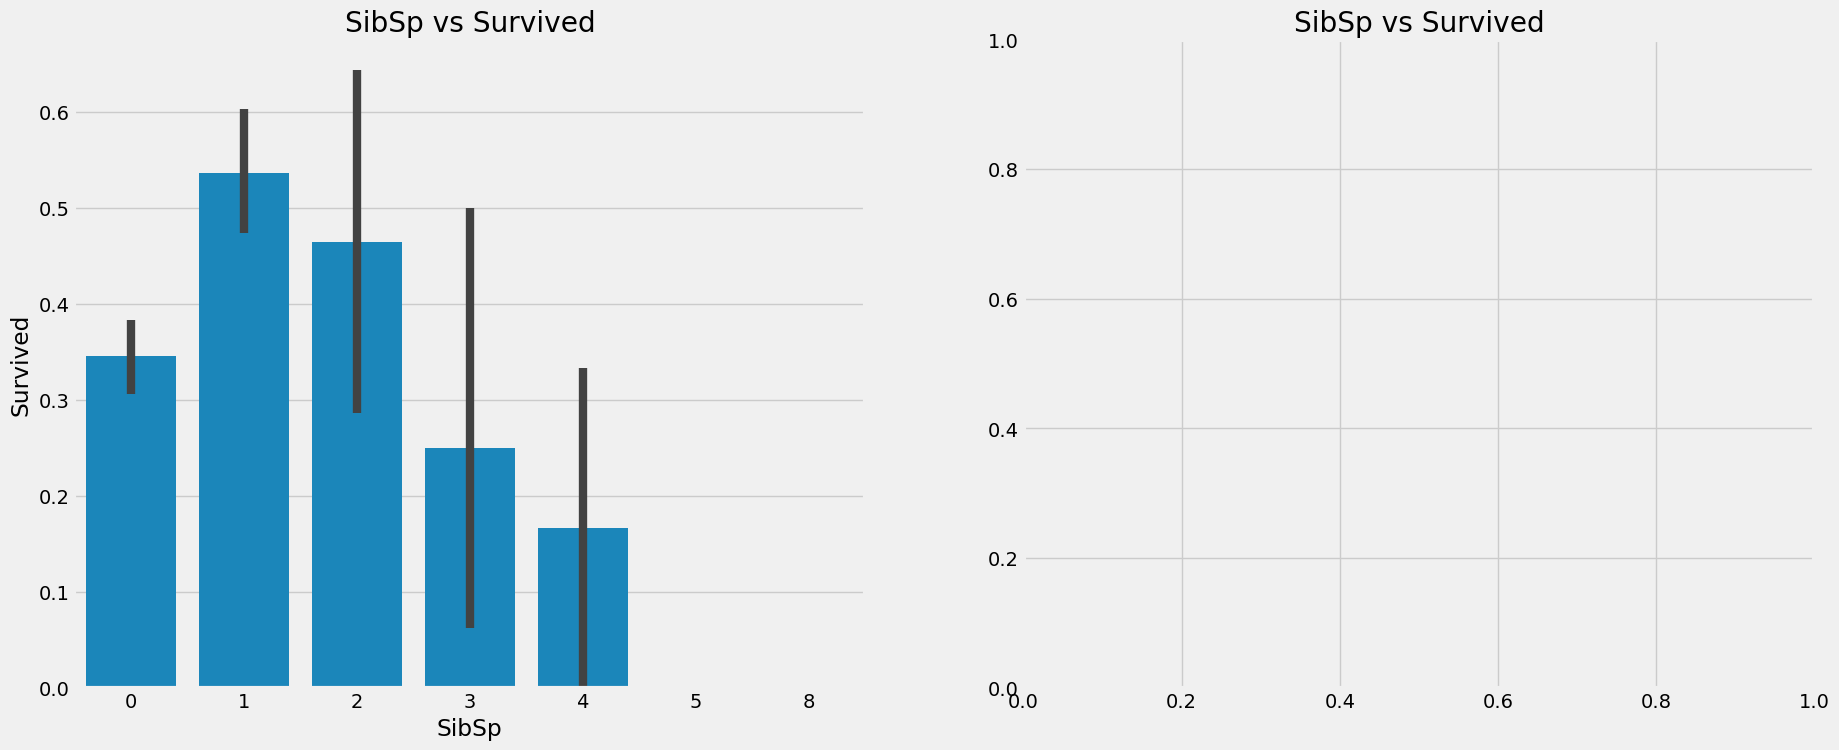

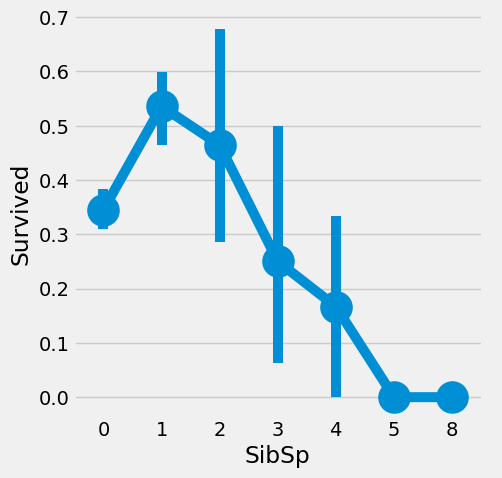

In [473]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.catplot(x='SibSp', y='Survived', data=data, kind='point')
ax[1].set_title('SibSp vs Survived')

# plt.close(2) 이걸 하면 catplot 그래프 출력이 안 됨
plt.show()

In [474]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


📌 Observations (관찰 내용)  
- 형제자매의 수가 증가함에 따라 생존율은 대체로 감소하는 경향을 보인다.
놀랍게도 형제자매가 5명에서 8명인 가족의 생존율은 희박하다.
그 이유는 아마도 **Pclass** 때문일 수 있다.
- 교차표를 보면, **SibSp**가 4 이상의 사람들은 모두 **Pclass 3**에 속한 승객들이다.
그래서 Pclass 3에 속한 대가족들이 대부분 사망했다는 사실은 명백하다.

## Parch
#### 함께 탑승한 부모 또는 자녀 수

In [475]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


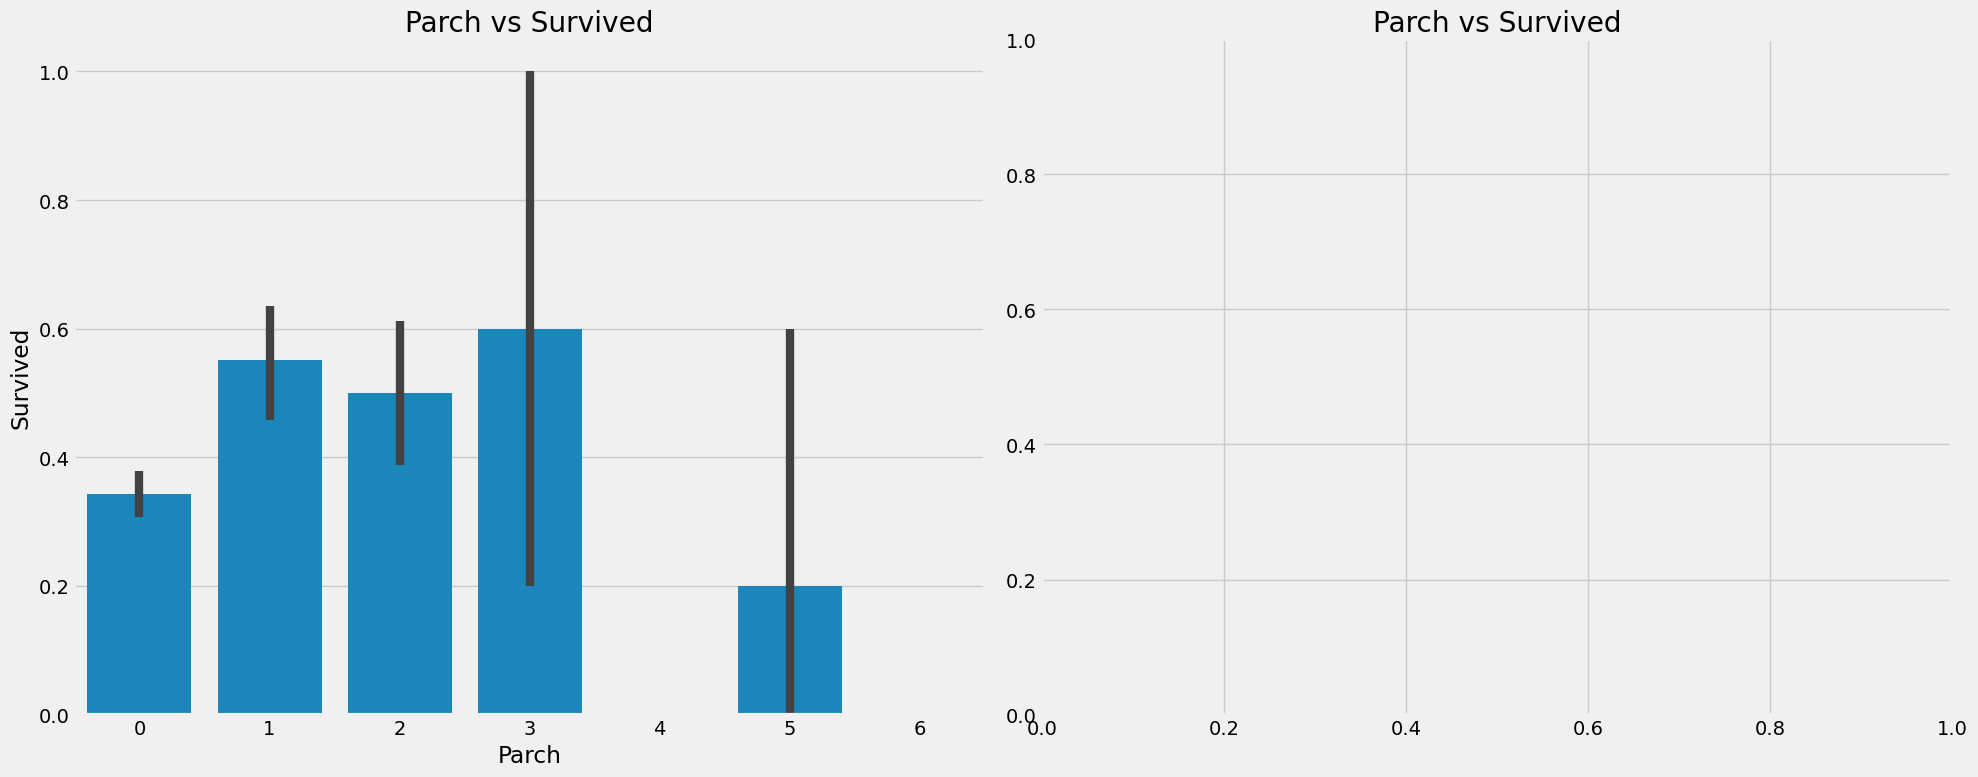

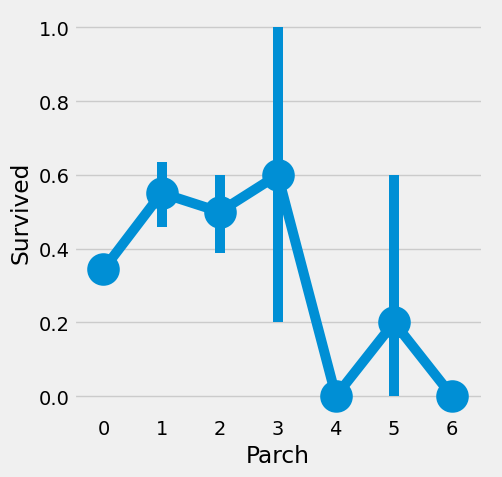

In [476]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.catplot(x='Parch',y='Survived',data=data,ax=ax[1],kind='point')
ax[1].set_title('Parch vs Survived')

f.tight_layout()
# plt.close(2)
plt.show()

📌 Observations (관찰 내용)
  
부모와 함께 승선한 승객들은 생존 가능성이 더 높다.  
그러나 부모의 수가 증가할수록 생존 가능성은 감소한다.  
  
부모가 1~3명 있는 경우 생존 확률이 높다.  
반면, 혼자 있는 경우에는 생존 가능성이 낮고, 4명 이상의 부모와 함께 있는 경우에는 생존 확률이 더욱 감소한다.

## Fare--> Continous Feature

In [477]:
print('Highest Fare was: ',data['Fare'].max(),)
print('Lowest Fare was: ',data['Fare'].min())
print('Average Fare was: ',round(data['Fare'].mean(), 2))

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.2


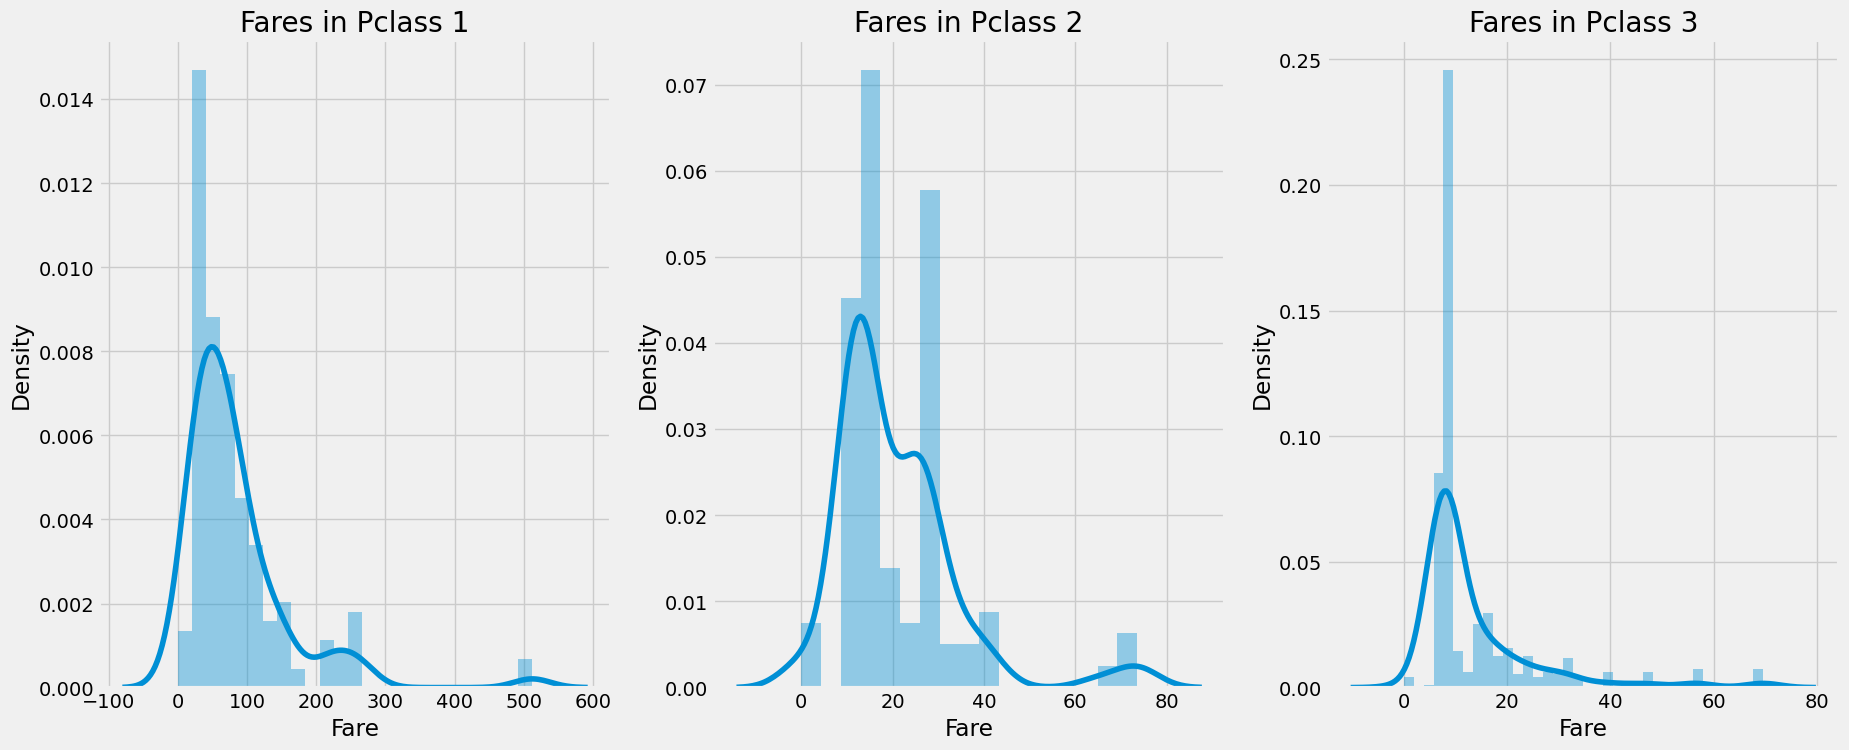

In [478]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

### 📌 **관찰 내용**:
- **Fare Distribution**: **Pclass1** 승객들의 요금 분포가 매우 넓고, 이 분포는 계급이 낮아질수록 감소한다.  
요금은 연속적인 값이기 때문에 **Binning**을 사용해 이를 이산적인 값으로 변환할 수 있다.  
  
### **모든 특성에 대한 핵심 관찰**:

- **Sex**: 여성의 생존 확률이 남성에 비해 높다.
  
- **Pclass**: 1등석 승객이 생존 확률이 더 높은 경향이 있다.  
**Pclass3**의 생존율은 매우 낮다.  
여성의 경우 **Pclass1**에서 생존 확률이 거의 1에 가까우며, **Pclass2**에서도 생존 확률이 높다.  
돈이 중요한 역할을 한다!
  
- **Age**: 5-10세 미만의 어린이는 높은 생존 확률을 보였다. 15세에서 35세 사이의 승객은 많은 수가 사망했다. 
  
- **Embarked**: **C**에서 승객들의 생존 확률이 더 높아 보인다. 이는 **Pclass1** 승객의 대부분이 **S**에서 탔음에도 불구하고 그렇다. **Q** 항구에서 승객들은 대부분 **Pclass3**에 속했다.
  
- **Parch + SibSp**: 1-2명의 형제자매나 배우자, 또는 1-3명의 부모가 함께 승선한 경우 생존 확률이 더 높다.
  반면, 혼자 있거나 대가족을 동반한 경우 생존 확률이 낮다.


연속적인 값을 Binning을 사용해 이산적인 값으로 변환한다는 점을 예시로 이해해보려 찾아보았다.
  
예시)  
요금(Fare) 값이 10, 20, 35, 50, 100 등으로 매우 다양한 경우, Binning을 사용해 0-50, 50-100, 100 이상으로 나누면  
분석할 때 더 명확한 경향을 볼 수 있다.

## Correlation Between The Features

In [479]:
# data

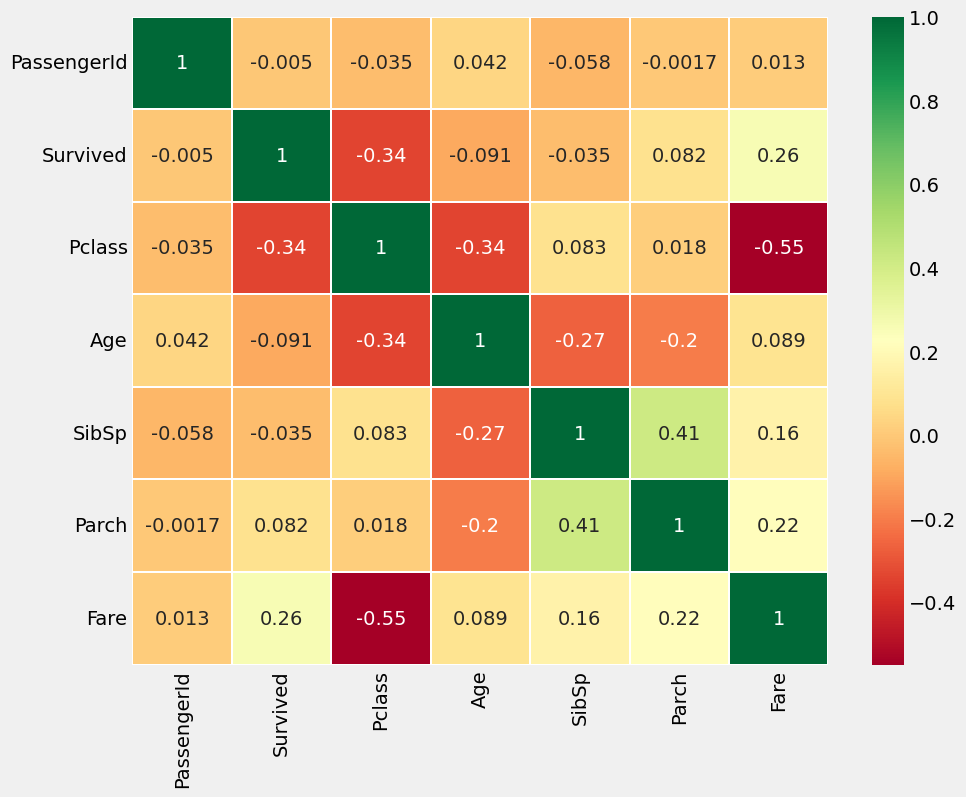

In [480]:
numeric_data = data.select_dtypes(include=['number']) # corr()할 때 object형도 있으므로 error 발생

sns.heatmap(numeric_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) # annot=True 상관계수를 표시
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

🔍 상관 행렬(Heatmap) 해석  
우선 주목할 점은, 상관 행렬은 숫자형 특성(numeric features)만 비교한다는 것이다.  
알파벳이나 문자열은 수치적으로 상관 관계를 계산할 수 없기 때문이다.  
  
상관 관계를 이해하기 전에, 먼저 상관 관계가 무엇인지 짚고 넘어가겠다.  
✅ 양의 상관관계 (Positive Correlation)  
특성 A가 증가할 때 특성 B도 증가한다면, 두 특성은 양의 상관관계에 있다고 본다.  
값이 1이면 완벽한 양의 상관관계를 의미한다.  
  
❌ 음의 상관관계 (Negative Correlation)  
특성 A가 증가할 때 특성 B는 감소한다면, 두 특성은 음의 상관관계에 있다고 본다.  
값이 -1이면 완벽한 음의 상관관계를 의미한다.  


📌 다중공선성(Multicollinearity)  
만약 두 특성이 매우 높은 상관관계를 가진다면, 한 특성의 변화가 다른 특성의 변화에 거의 동일하게 반영된다는 의미다.  
즉, 두 특성 모두 거의 동일한 정보를 담고 있으며, 정보의 다양성(분산)이 부족하다는 것을 나타낸다.  
  
이러한 현상을 **다중공선성(Multicollinearity)**이라고 한다.  
두 특성이 거의 같은 정보를 포함하고 있기 때문에, 그중 하나는 중복된 것으로 간주되며, 모델 학습 시 제거하는 것이 좋다.

## Part2: Feature Engineering and Data Cleaning

🔧 Feature Engineering(특성 공학)이란?  
주어진 데이터셋에 여러 특성이 포함되어 있다고 해서, 그 모든 특성이 반드시 중요한 것은 아니다.  
많은 특성들 중에는 중복되거나 불필요한 특성이 있을 수 있으며, 이런 특성들은 제거하는 것이 좋다.  
  
또한, 기존의 특성에서 새로운 특성을 추출하거나 만들어낼 수도 있다.   
예를 들어, Name 특성에서 Initials(이니셜)과 같은 새로운 특성을 도출할 수 있다.  
  
Feature Engineering은 다음과 같은 작업을 포함한다:  

- 중요하지 않은 특성 제거
- 유의미한 새로운 특성 생성
- 예측 모델링에 적합하도록 기존 특성 변환  
  
이제 어떤 새로운 특성을 만들 수 있고, 어떤 특성을 제거할 수 있을지 살펴보겠다.  
또한 예측 모델링을 위해 현재 사용 중인 특성들을 더 적절한 형태로 변환할 것이다.

## Age_band

🔧 **Feature Engineering**이란?  
데이터셋이 주어졌을 때, 모든 특성이 항상 중요한 것은 아니다.  
중복되거나 불필요한 특성은 제거해야 하며,  
다른 특성에서 정보를 추출하거나 관찰하여 새로운 특성을 생성할 수도 있다.  
  
예를 들어, Name(이름)특성에서 Initials(이니셜)이라는 새로운 특성을 추출하는 것이 그 예시이다.  
  
이제 불필요한 특성을 제거하고, 새로운 특성을 생성하거나,  
기존의 특성들을 예측 모델링에 적합한 형태로 변환(transform)해보자.

In [481]:
# vector화
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,0


In [482]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


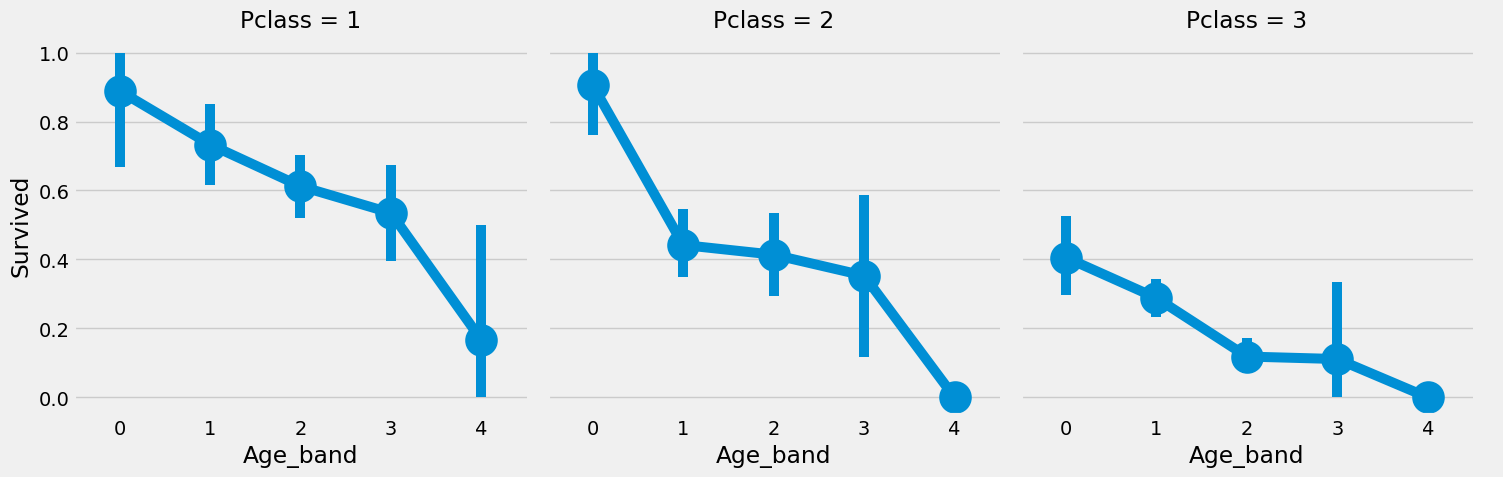

In [483]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass',kind='point')
plt.show()

### Family_Size와 Alone

이제 **Family_Size**와 **Alone**이라는 새로운 특성을 생성해서 분석할 수 있다.  
**Family_Size**는 **Parch**와 **SibSp**의 합으로, 승객의 가족 크기를 나타낸다.  
이 값을 통해 승객의 가족 크기와 생존율 간의 관계를 파악할 수 있다.  
**Alone**은 승객이 혼자 탑승했는지 여부를 나타내는 특성으로, 승객이 혼자인지 아닌지를 확인하는 데 사용할 수 있다.

이 특성들을 사용하면 승객이 가족과 함께 탑승했을 때 생존율에 어떤 영향을 미치는지 분석할 수 있다.



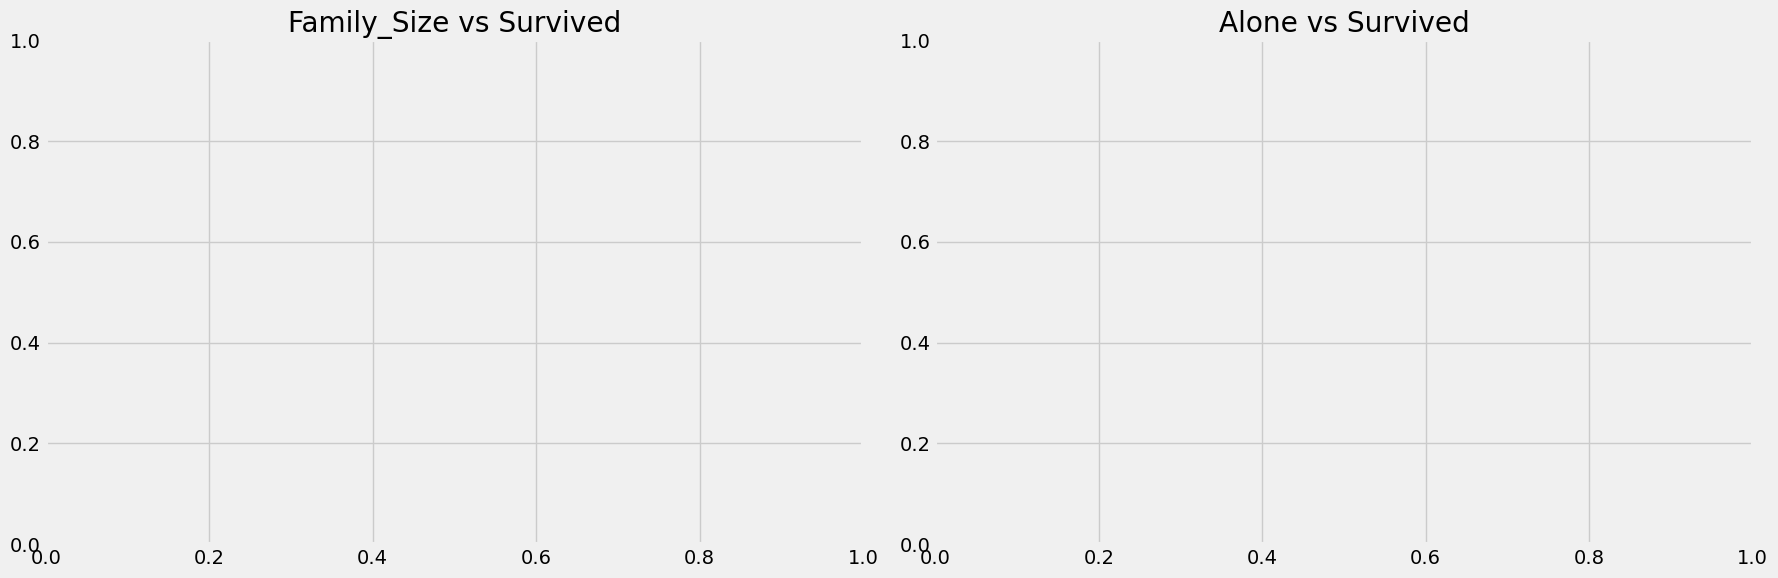

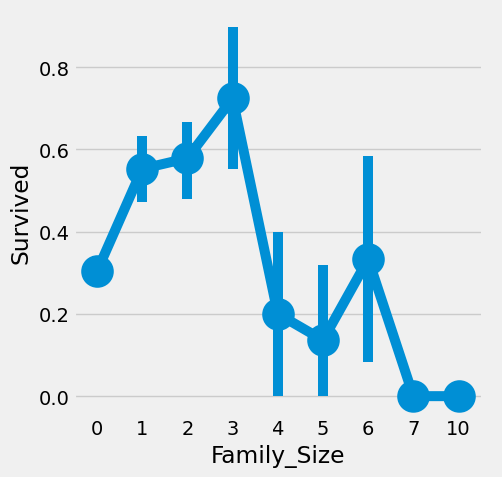

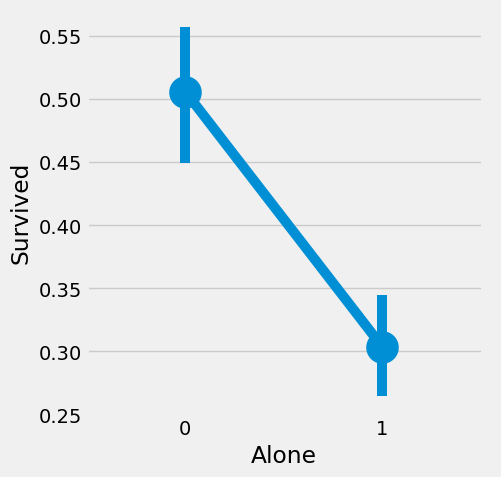

In [484]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp'] # family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1 # Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.catplot(x='Family_Size',y='Survived',data=data,ax=ax[0],kind='point')
ax[0].set_title('Family_Size vs Survived')

sns.catplot(x='Alone',y='Survived',data=data,ax=ax[1],kind='point')
ax[1].set_title('Alone vs Survived')

# plt.close(2)
# plt.close(3)
f.tight_layout()
plt.show()

### Family_Size

**Family_Size**가 0이면 승객이 혼자 있다는 뜻이다.  
명확하게도, 혼자 있거나 **Family_Size = 0**일 경우 생존 확률이 매우 낮다.  
가족 크기가 4명 이상인 경우에도 생존 확률이 낮아진다.  
이 특성은 모델에서 중요한 역할을 할 수 있을 것 같다. 좀 더 자세히 분석해보자.


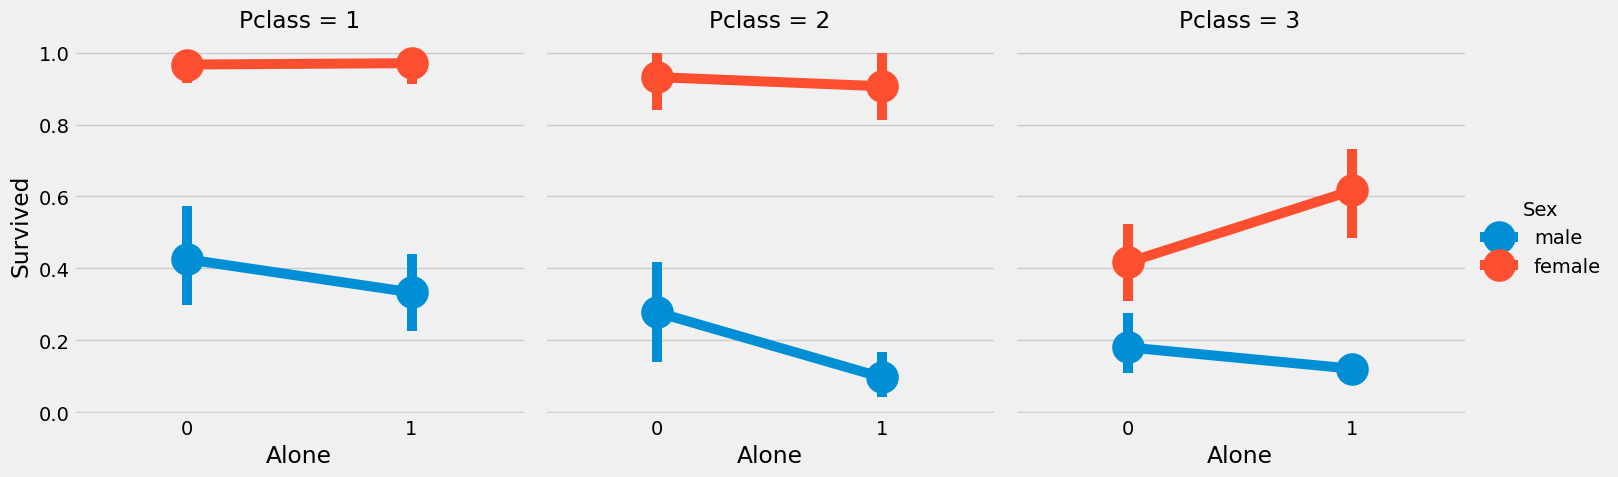

In [485]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

혼자 있는 것이 **Sex**나 **Pclass**와 상관없이 해롭다는 것을 알 수 있다.
- 혼자 있으면 성별이나 PClass 상관없이 왜 해로운지 모르겠다. 생존율이 높은데..?

  
단, **Pclass 3**에서는 혼자 있는 여성의 생존 확률이 가족과 함께 있는 여성보다 높다.

## Fare_Range

요금(Fare)도 연속적인 특성이기 때문에, 이를 순서형 값(Ordinal Value)으로 변환해야 한다.  
이를 위해 `pandas.qcut`을 사용할 것이다.

qcut은 우리가 지정한 개수의 구간(빈)으로 값을 나눈다.  
예를 들어, 5개의 빈을 지정하면, qcut은 값을 균등하게 분할하여 5개의 구간 또는 값 범위로 나눈다.

이 방식은 연속적인 데이터를 구간별로 나누어 모델에 적용할 수 있는 형태로 변환할 수 있게 해준다.

In [486]:
data['Fare'].min()

0.0

In [487]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)

In [488]:
data['Fare_Range'].value_counts()
# qcut()은 균등하게 데이터가 들어가도록 구간을 나눈다.

Fare_Range
(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: count, dtype: int64

In [489]:
data.groupby(['Fare_Range'])['Survived'].mean()
# Fare_Range로 그룹화하여 생존율 확인

Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [490]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare_Range는 현재 구간 형태로 되어 있어서 모델에 바로 사용할 수 없다.  
그래서 각 구간을 숫자 값으로 변환해야 한다.  
Age_Band처럼 구간을 특정 값으로 바꾼다.  
예를 들어, 각 구간의 평균값이나 중간값을 사용할 수 있다.

In [491]:
# 범위를 명확하게 지정해주어야 한다.
# 아래 코드는 원하는 결과를 얻지 못한다.

# data['Fare_Cat'] = 0
# data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
# data.loc[data['Fare'] <= 14.454, 'Fare_cat'] = 1
# data.loc[data['Fare'] <= 31.0, 'Fare_cat'] = 2
# data.loc[data['Fare'] <= 512.329, 'Fare_cat'] = 3

In [492]:
# sns.catplot(x= 'Fare_cat', y='Survived',data=data,hue='Sex', kind='point')
# plt.show()

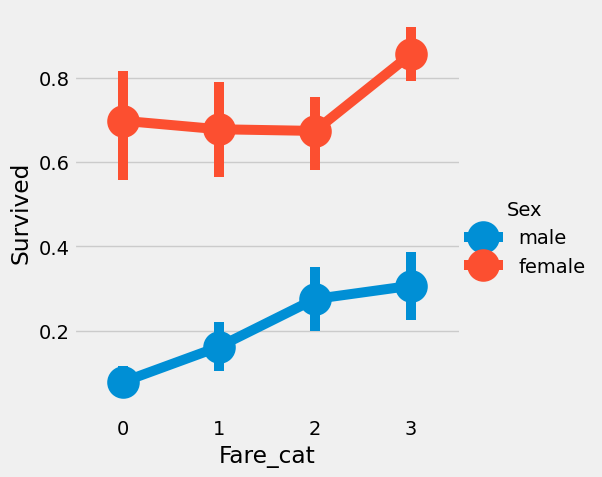

In [493]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

sns.catplot(x= 'Fare_cat', y='Survived',data=data,hue='Sex', kind='point')
plt.show()

성별에 따른 생존 확률  
명확히 말하자면, Fare_cat이 증가할수록 생존 확률도 증가하는 경향이 있다.  
이 특성은 모델링 과정에서 중요한 특성이 될 수 있다.  
Sex와 함께 사용하면 모델 성능을 향상시킬 수 있다.

## Converting String Values into Numeric
### 문자열 값을 숫자로 변환하기

기계 학습 모델에서는 문자열 값을 직접 사용할 수 없기 때문에, Sex, Embarked 등의 특성을 숫자 값으로 변환해야 한다.  
이를 위해 가장 일반적으로 사용하는 방법은 라벨 인코딩(Label Encoding) 또는 원-핫 인코딩(One-Hot Encoding)이다.
  
- 라벨 인코딩(Label Encoding): 각 카테고리 값을 고유한 숫자로 변환하는 방식이다.
- 원-핫 인코딩(One-Hot Encoding): 각 카테고리 값을 새로운 이진 특성(0 또는 1)을 만들어 표현하는 방식이다.

In [494]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## Dropping UnNeeded Features

- Name → 이름 특성은 카테고리 값으로 변환할 수 없기 때문에 필요하지 않다.

- Age → 나이는 Age_band 특성으로 대체할 수 있으므로 필요하지 않다.

- Ticket → 티켓 번호는 랜덤한 문자열이기 때문에 카테고리화할 수 없다.

- Fare → Fare_cat 특성이 있으므로 중복된 특성이다.

- Cabin → NaN 값이 많고, 여러 객실을 가진 승객도 있기 때문에 분석에 도움이 되지 않는다.

- Fare_Range → Fare_cat 특성이 있으므로 불필요하다.

- PassengerId → 이 특성은 카테고리화할 수 없으므로 필요 없다.

In [495]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)

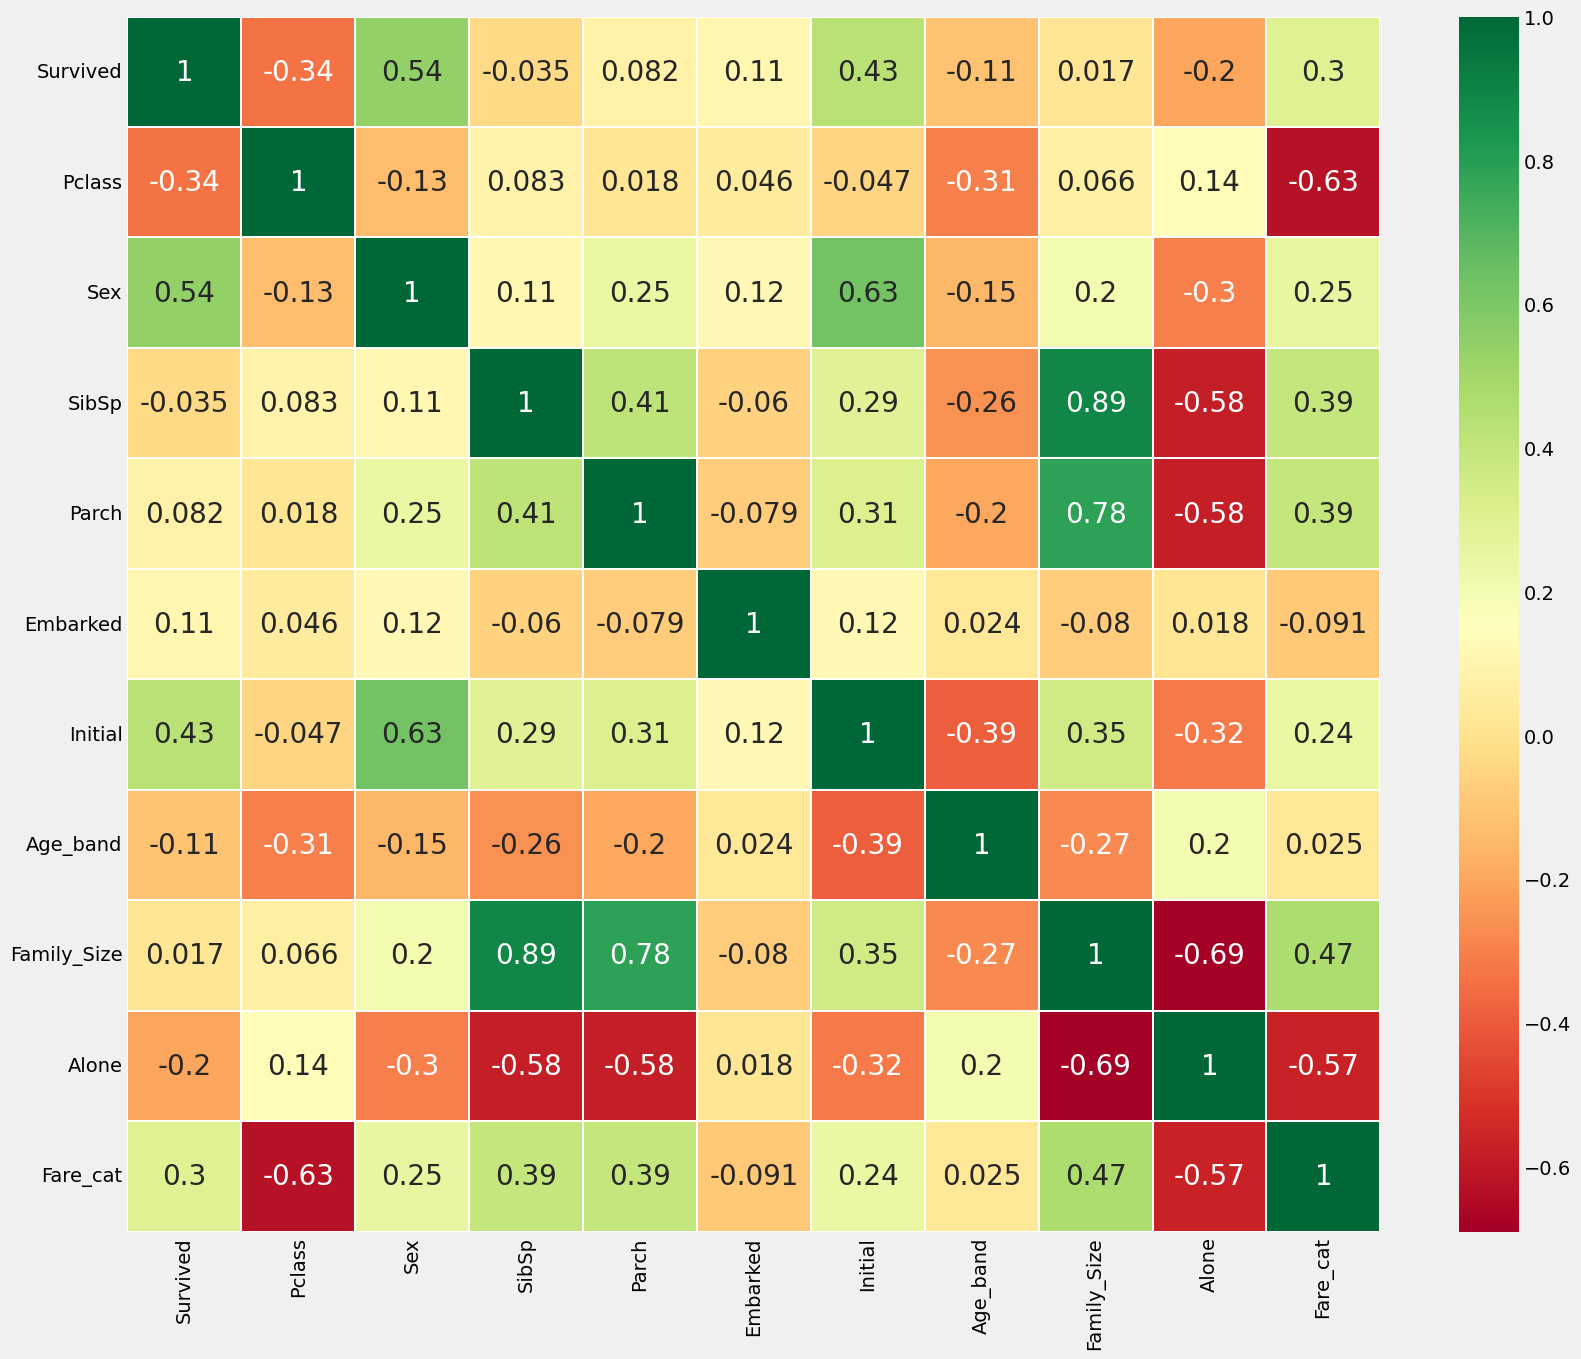

In [496]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

SibSp and Family_Size, Famil_Size and Parch는 상관계수가 높다.  
반면에 Alone and Family_Size는 상관계수가 낮다.

## Part3: 예측 모델링
우리는 EDA(탐색적 데이터 분석)에서 일부 통찰을 얻었지만, 이를 기반으로 승객이 생존할지 사망할지 정확히 예측할 수는 없다.  
이제 우리는 몇 가지 훌륭한 분류 알고리즘을 사용하여 승객의 생존 여부를 예측할 것이다. 사용될 알고리즘은 다음과 같다:  

- 로지스틱 회귀 (Logistic Regression)

- 서포트 벡터 머신 (SVM) - 선형 및 비선형 (Radial)

- 랜덤 포레스트 (Random Forest)

- K-최근접 이웃 (K-Nearest Neighbours)

- 나이브 베이즈 (Naive Bayes)

- 결정 트리 (Decision Tree)

- 로지스틱 회귀 (Logistic Regression)  
  
이 알고리즘들을 사용하여 승객이 생존할 확률을 예측하고 모델을 학습시킬 것이다.

In [497]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [498]:
# 데이터를 훈련 세트와 테스트 세트로 나눈다. 
# test_size=0.3: 데이터의 30%를 테스트 세트로 사용하고, 나머지 70%를 훈련 세트로 사용
# random_state=0: 랜덤 시드를 고정시켜 동일한 분할을 유지
# stratify=data['Survived']: 'Survived' 값을 기준으로 데이터를 분할하여 생존자와 사망자의 비율을 유지
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

# 훈련 세트에서 독립 변수(features)만 추출 (Survived 컬럼을 제외한 나머지 컬럼들)
train_X = train[train.columns[1:]]
# 훈련 세트에서 종속 변수(target)인 'Survived'만 추출
train_Y = train[train.columns[:1]]

# 테스트 세트에서 독립 변수(features)만 추출 (Survived 컬럼을 제외한 나머지 컬럼들)
test_X = test[test.columns[1:]]
# 테스트 세트에서 종속 변수(target)인 'Survived'만 추출
test_Y = test[test.columns[:1]]

# 전체 데이터에서 'Survived' 컬럼을 제외한 모든 특성을 추출 (X: 독립 변수들)
X = data[data.columns[1:]]
# 전체 데이터에서 'Survived' 컬럼만 추출 (Y: 종속 변수)
Y = data['Survived']


### Logistic Regression

In [499]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction1,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Support Vector Machines(Linear and radial)

Linear Support Vector Machine(linear-SVM) 선형적으로 분리 가능한 경우에 사용

In [500]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2_1=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2_1,test_Y))

Accuracy for linear SVM is 0.8171641791044776


Radial Support Vector Machines(rbf-SVM)
비선형 문제를 해결하는 데 사용

In [501]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2_2=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction2_2,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### 차이점 정리
#### 커널 종류

- Linear SVM: kernel='linear'
- RBF SVM: kernel='rbf'

#### 기능

- Linear SVM은 선형 분리 가능한 데이터에 적합.
- RBF SVM은 비선형 데이터에 적합.

### Random Forest

In [502]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


### K-Nearest Neighbours

In [503]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the KNN is 0.8134328358208955


KNeighborsClassifier의 n_neighbors 값을 여러 개로 바꿔가면서 정확도를 확인

```
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())
```

최근 pandas 버전에서 .append() 메서드가 삭제되었기 때문에 오류가 발생한다.  
  
🔧 해결 방법  
Series.append() 대신 pd.concat()을 쓰면 된다.

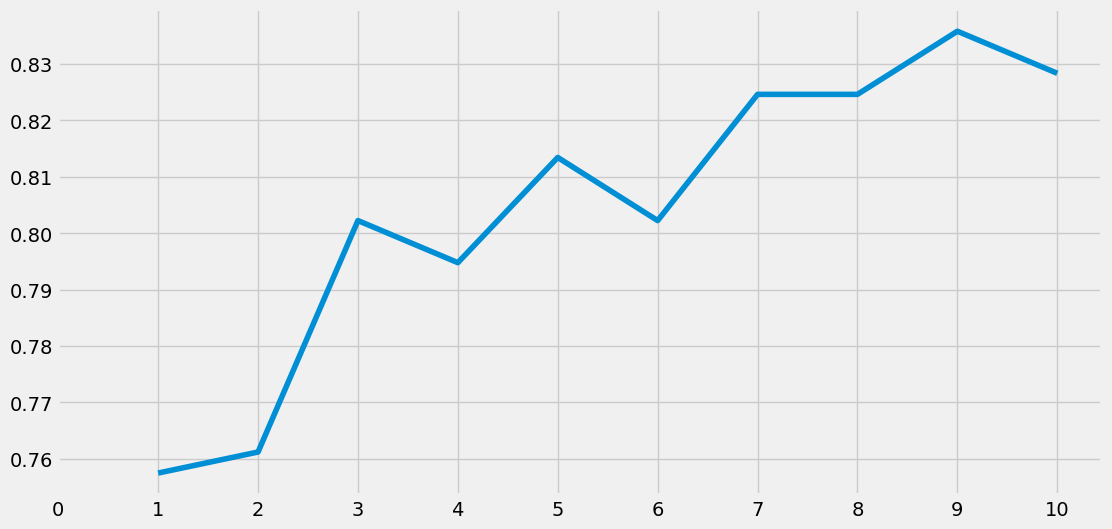

각 k값에 대한 정확도: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821]
최고 정확도: 0.835820895522388 최고 정확도를 낸 이웃 수(k): 9


In [504]:
# append ->concat 바꾸면 출력 결과가 조금 다르게 나옴


a_index = list(range(1, 11))  # 1부터 10까지
a = pd.Series()               # 빈 시리즈 생성
x = list(range(0, 11))        # x축 눈금

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    
    # 정확도 계산해서 시리즈에 추가
    accuracy = metrics.accuracy_score(prediction, test_Y)
    a = pd.concat([a, pd.Series([accuracy])])

# 정확도 시각화
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

# 결과 출력
print("각 k값에 대한 정확도:", a.values)
print("최고 정확도:", a.values.max(), "최고 정확도를 낸 이웃 수(k):", a_index[a.values.argmax()])


### Naive Bayes

In [505]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Decision Tree

In [506]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


모델 정확도만으로는 강력한 분류기라고 할 수 없다.  
모델이 학습 데이터로 학습하고 테스트 데이터로 테스트해서 정확도 90%를 얻었다고 해보자.  
  
이건 얼핏 보면 꽤 좋은 성능처럼 보이지만, 앞으로 들어올 새로운 테스트 데이터셋들에서도 계속 90%를 유지할 수 있을까?  
정답은 아니다.  
  
왜냐면 모델이 어떤 데이터를 학습에 사용할지에 따라 결과가 달라질 수 있기 때문이다.  
학습 데이터와 테스트 데이터가 바뀌면 정확도도 오르락내리락할 수 있다.  
이런 걸 **모델 분산**(variance)이라고 한다.  
  
그럼 이걸 어떻게 해결할까?  
바로 **교차 검증**(Cross Validation)을 사용한다.  
  
이 방법을 쓰면 데이터를 여러 번 나눠서 학습/테스트를 반복하고, 그 평균 성능을 보는 방식이다.  
이렇게 하면 우연에 의한 성능 편차를 줄이고, 일반화된(generalized) 모델을 만들 수 있다.  
  
필요하면 Cross Validation 코드에 대해 알아보자.

## 교차 검증 (Cross Validation)

많은 경우, 데이터가 불균형할 수 있다.
예를 들어, 어떤 클래스(예: 생존한 사람)는 많고, 다른 클래스(예: 사망한 사람)는 적을 수 있다.

그래서 알고리즘을 전체 데이터셋의 모든 데이터 인스턴스에 대해 학습하고 테스트하는 게 좋다.
이렇게 하면 여러 번 측정한 정확도 평균을 구할 수 있고, 더 신뢰할 수 있는 모델 평가가 가능하다.

💡 K-Fold 교차 검증이란?
먼저 데이터셋을 **k개의 하위 셋(subsets)**으로 나눈다.

예를 들어 k=5라면, 데이터를 5등분해서, 그중 1개는 테스트용, 나머지 4개는 학습용으로 사용한다.

그런 다음, 테스트용 부분을 하나씩 바꿔가면서 총 5번 반복한다.
매번 학습-테스트를 반복하면서 정확도나 에러율을 기록한다.

마지막에는 5번의 정확도를 평균내서 모델의 성능을 평가한다.

이게 바로 K-Fold 교차 검증이다.

🤔 왜 교차 검증이 필요할까?
어떤 데이터셋에서는 알고리즘이 underfit될 수 있고,
다른 셋에서는 overfit될 수도 있다.

즉, 학습 데이터가 바뀌면 성능도 변할 수 있다는 말이다.
그래서 교차 검증을 통해 일반화된(generalized) 모델을 만들 수 있다.

In [507]:
# shuffle = True 로 해주어야 오류가 발생하지 않는다.
# random_state를 설정해주었는데 default가 shuffle=False 라서 생긴 오류다.

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, shuffle=True,random_state=22) # k=10, split the data into 10 equal parts
mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean(각 모델 정확도의 평균)':mean,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean(각 모델 정확도의 평균),Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.810387,0.041506
Decision Tree,0.802497,0.047054
Naive Bayes,0.795843,0.054861
Random Forest,0.814856,0.052098


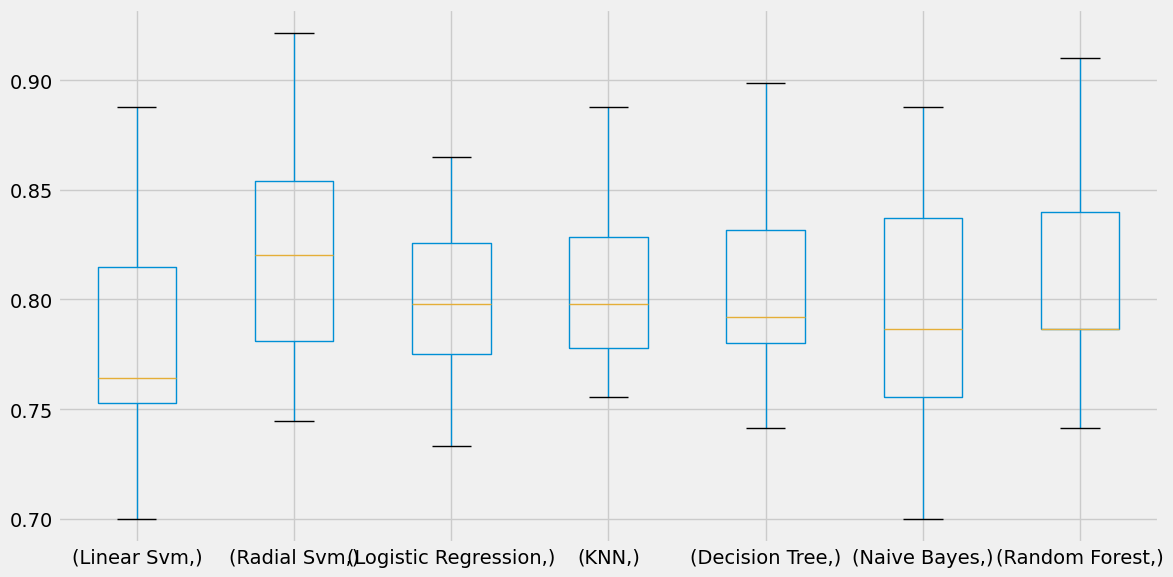

In [508]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

plt.tight_layout()
plt.show()

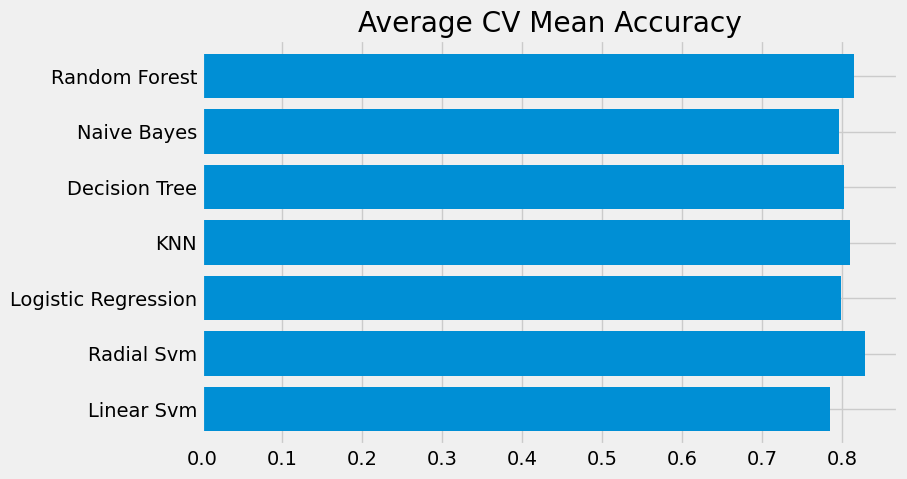

In [509]:
new_models_dataframe2['CV Mean(각 모델 정확도의 평균)'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 불균형 문제로 인해 때때로 오해를 불러일으킬 수 있다.  
혼동 행렬을 사용하면 모델이 어디에서 잘못 예측했는지, 또는 어떤 클래스를 잘못 예측했는지를 확인할 수 있다.

## Confusion Matrix

True Positives (TP): 올바르게 예측된 긍정 클래스의 수

True Negatives (TN): 올바르게 예측된 부정 클래스의 수

False Positives (FP): 잘못 긍정 클래스로 예측한 부정 클래스의 수

False Negatives (FN): 잘못 부정 클래스로 예측한 긍정 클래스의 수

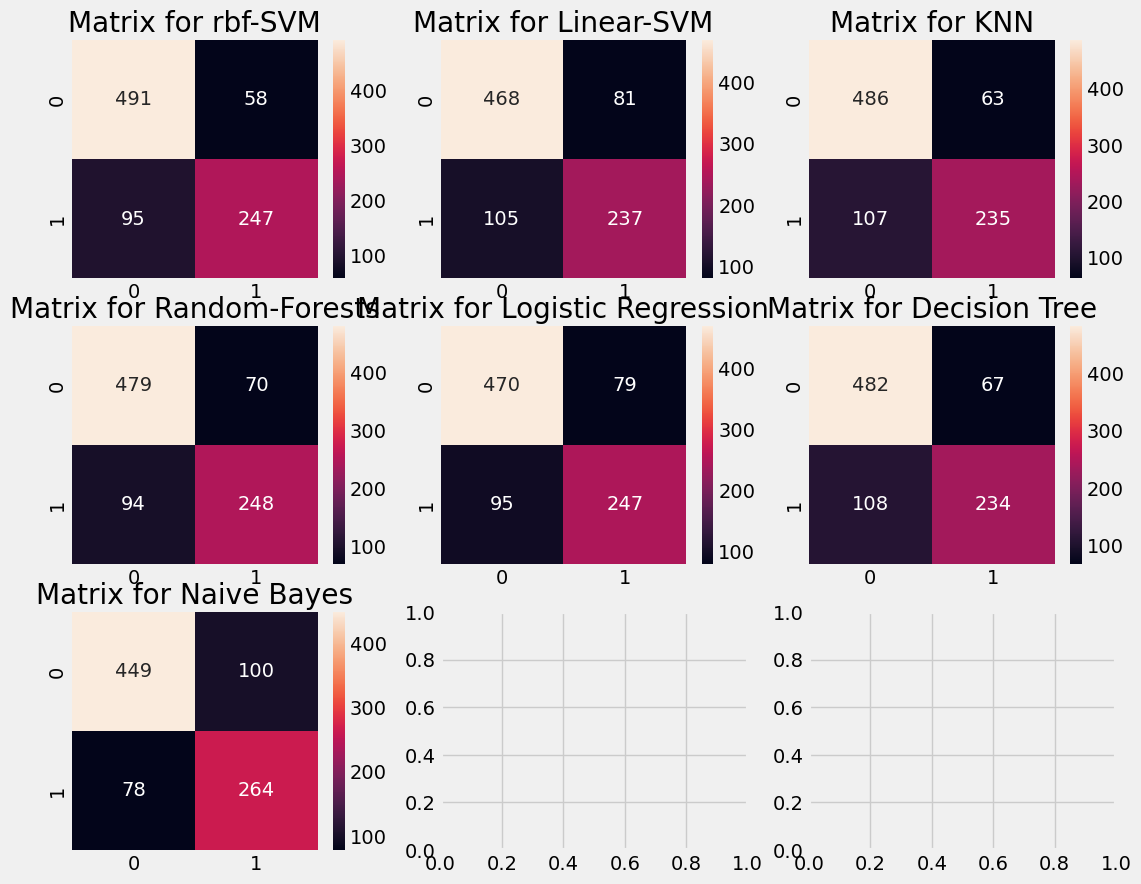

In [510]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Confusion Matrix 해석
Confusion Matrix에서 왼쪽 대각선은 각 클래스에 대해 올바르게 예측된 수를 나타내고, 오른쪽 대각선은 잘못 예측된 수를 나타낸다. 예를 들어, rbf-SVM의 경우를 살펴보겠다:

정확한 예측:

사망자(Dead) 예측: 491명

생존자(Survived) 예측: 247명

평균 정확도: (491 + 247) / 891 = 82.8% (이전에서 계산한 것과 일치)

오류:

잘못 예측된 사망자: 58명을 생존자로 예측

잘못 예측된 생존자: 95명을 사망자로 예측

결론: rbf-SVM 모델은 사망자를 생존자로 잘못 예측하는 경우가 많고, 생존자를 사망자로 예측하는 경우도 존재하지만 상대적으로 사망자 예측에서 더 많은 오류가 발생한다.

이렇게 각 모델의 confusion matrix를 보고 나서, 각 모델의 장단점을 비교할 수 있다. 예를 들어, rbf-SVM은 사망자 예측에서 잘 작동하는 반면, Naive Bayes는 생존자 예측에서 더 정확한 결과를 보일 수 있다.

## 하이퍼파라미터 튜닝
머신러닝 모델은 블랙박스처럼 동작하며, 이 모델은 기본적으로 몇 가지 하이퍼파라미터 값을 갖고 있다. 이 하이퍼파라미터들은 모델을 최적화하고 더 좋은 성능을 낼 수 있도록 조정할 수 있다. 예를 들어, SVM 모델에서는 C와 gamma 값을, 랜덤 포레스트에서는 나무의 개수(n_estimators)와 최대 깊이(max_depth) 등 여러 파라미터를 조정할 수 있다.

하이퍼파라미터 튜닝의 목적은 알고리즘의 학습률을 조정하고, 모델의 성능을 최적화하는 것이다. 이를 통해 모델이 주어진 데이터셋에 대해 더 나은 예측을 할 수 있도록 만든다.

주요 하이퍼파라미터 튜닝 방법:

- Grid Search: 여러 하이퍼파라미터 값들을 지정하고, 그 값들을 조합해가며 최적의 파라미터를 찾는 방법
- Random Search: 여러 파라미터 값들 중 랜덤하게 선택하여 최적의 값을 찾는 방법
- Bayesian Optimization: 확률적 모델을 사용하여 최적의 하이퍼파라미터를 찾는 방법

결론: SVM과 Random Forest와 같은 모델들은 하이퍼파라미터 튜닝을 통해 성능을 크게 개선할 수 있다. 튜닝을 통해 모델이 데이터를 더 잘 학습하고 예측할 수 있도록 도와준다.

### SVM

In [511]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### 결론
이 모델은 C=0.5와 gamma=0.1로 설정된 rbf 커널을 사용하는 서포트 벡터 머신(SVM) 모델을 사용하여 82.83%의 교차 검증 정확도를 기록했다.

이 결과는 GridSearchCV를 통해 가장 성능이 좋은 하이퍼파라미터 조합을 찾은 후 나온 값이다.

### Random Forests

In [512]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


### 결론
이 RandomForestClassifier 모델은 900개의 트리로 학습하며, 81.71%의 교차 검증 정확도를 기록했다.

모델의 하이퍼파라미터는 기본 값들을 대부분 사용하였고, 최적의 하이퍼파라미터 조합으로 학습되었음을 의미한다.

## Ensembling

**앙상블**(Ensembling)은 모델의 정확도나 성능을 향상시키는 좋은 방법이다.  
간단히 말하면, 여러 개의 간단한 모델들을 결합하여 하나의 강력한 모델을 만드는 방식이다.
  
예를 들어, 우리가 전화기를 구매하고자 할 때, 여러 사람에게 다양한 파라미터를 기반으로 의견을 물어본다. 그런 후 다양한 의견을 종합하여 제품에 대한 강력한 판단을 내린다. 이것이 바로 앙상블 기법이다. 앙상블 기법은 모델의 안정성을 향상시킨다.
  
앙상블 기법은 여러 가지 방식으로 구현할 수 있다:
  
1. **투표 분류기(Voting Classifier)**: 여러 모델이 예측한 결과를 종합하여 최종 예측을 결정한다. 보통 다수결 원칙을 따르거나 확률 기반으로 투표를 진행한다.

2. **배깅(Bagging)**: 여러 개의 모델을 독립적으로 학습시켜 예측을 통합하는 방식이다. 각 모델은 데이터를 부트스트래핑(복원 추출)하여 학습하고, 그 예측 결과를 평균 또는 다수결로 결합한다. 대표적인 알고리즘으로 **랜덤 포레스트(Random Forest)**가 있다.

3. **부스팅(Boosting)**: 여러 개의 약한 학습자(weak learners)를 순차적으로 학습시켜 점진적으로 성능을 향상시키는 방법이다. 이전 모델의 오류를 다음 모델이 수정하도록 학습시키며, 대표적인 알고리즘으로 **Adaboost**, **Gradient Boosting**, **XGBoost** 등이 있다.


### Voting Classifier

In [513]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8226716604244693


In [514]:
# pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----------------- ---------------------- 5.0/11.1 MB 25.1 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 24.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
Note: you may need to restart the kernel to use updated packages.


### Bagging

In [516]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


#### error solution
BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator' #68  

base_estimator -> estimator로 변환  
참고: https://github.com/scikit-learn-contrib/skope-rules/issues/68

Bagged DecisionTree

In [519]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

#### AdaBoost(Adaptive Boosting)

In [520]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

In [521]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [524]:
# pip install xgboost

In [525]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8182771535580524


#### Hyper-Parameter Tuning for AdaBoost

In [ ]:
# n_estimators=list(range(100,1100,100))
# learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
# hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
# gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
# gd.fit(X,Y)
# print("gd.best_score_:",gd.best_score_)
# print("gd.best_estimator_:",gd.best_estimator_)

## Confusion Matrix for the Best Model

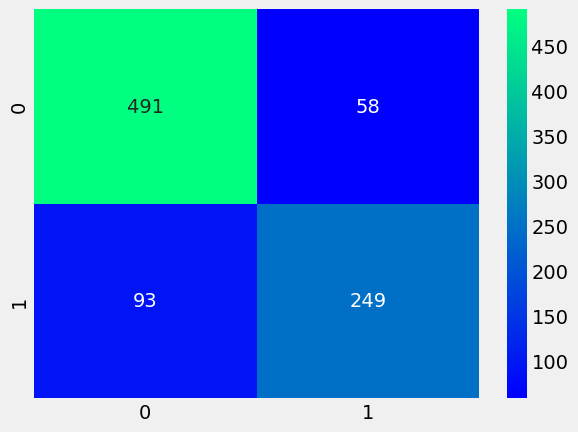

In [527]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

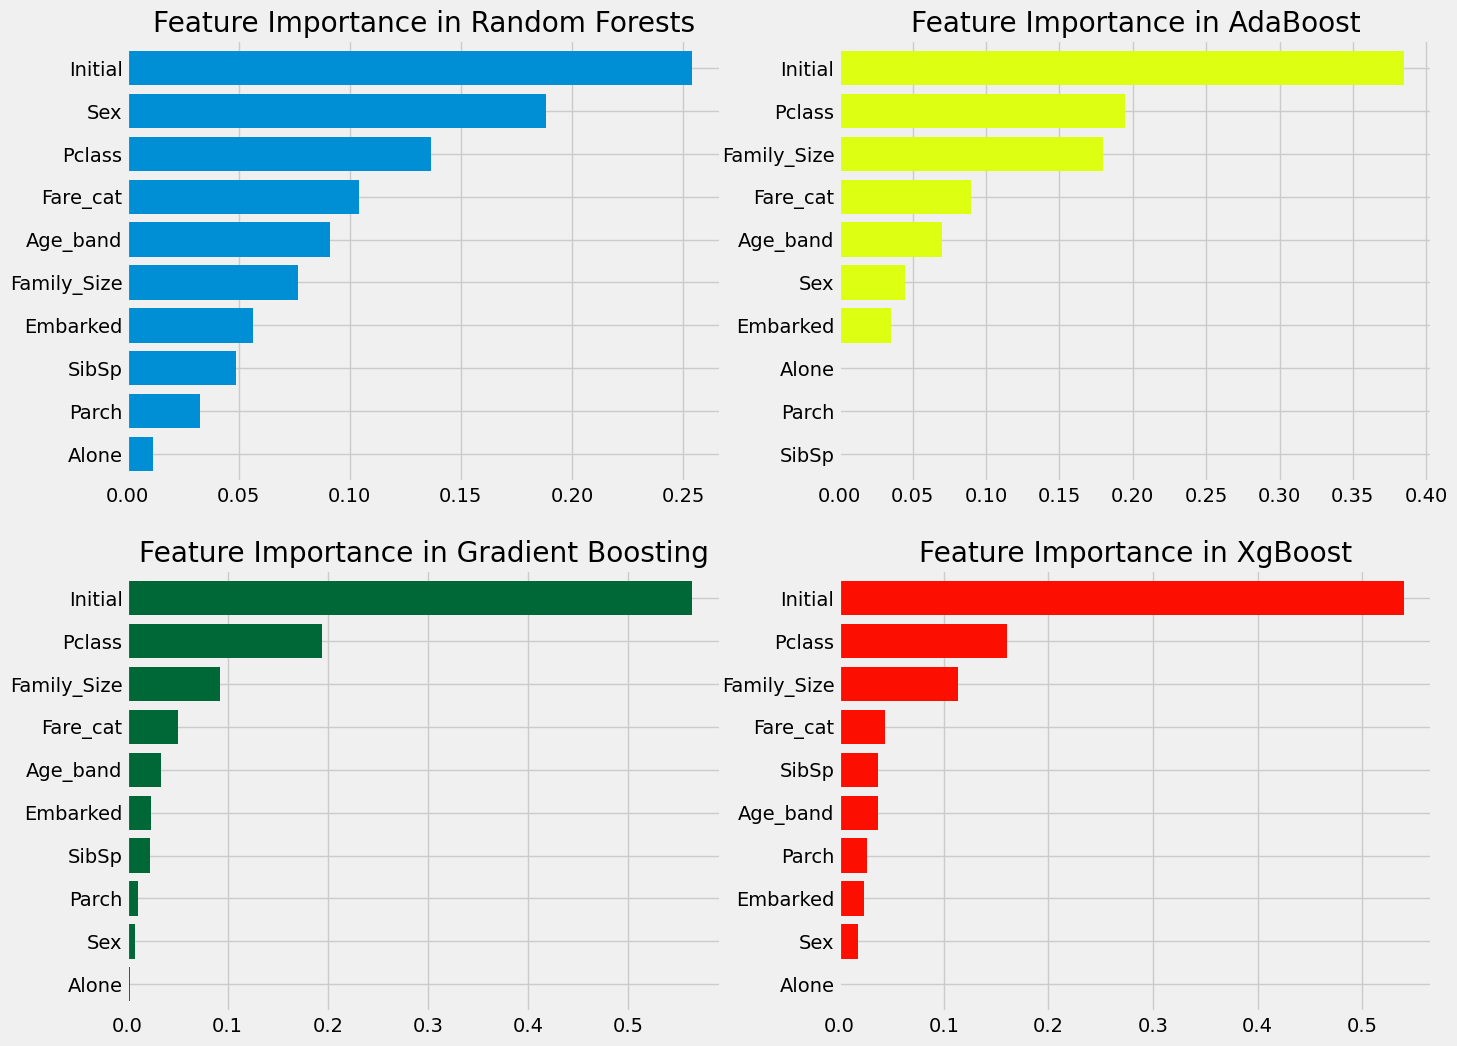

In [528]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()